# Dennis Mwanzia
# Phase 3 Project
# Classification of Water Wells in Tanzania

# Table of Contents
1.	Introduction
2.	Aim
3.	Objectives
4.	Data Source
5.	Client
6.	Import Libraries, Modules & Functions
7.	Obtain Data/Load Data
8.	Merging the Data Frames
9.	Data Cleaning
10.	Column description and Understanding
11.	Data Understanding
12.	Checking for null values
13.	Inspecting and dealing with columns with Missing data
14.	Dealing with columns that have similar data
15.	The Target Column Inspection
16.	Describing the numerical columns
17.	Checking Other Irrelevant Columns & Initial Feature Engineering
18.	Visualization of Target vs Selected Features
19.	Visualizations using GeoPandas
20.	Importing Tanzania Geographical data
21.	Mapping Waterpoints by Function
22.	Well Functionality by Management
23.	Mapping the status of wells by Level of water quantity
24.	Waterpoint functional status by Basin
25.	Mapping Waterpoint Type Map
26.	Mapping Well sources
27.	Waterpoint Payment Type Mapping
28.	Visualization Other Categorical columns
29.	Modelling
a)	Initial Model/Dummy Model
b)	Decision Tree Classifier
c)	Logistic Regression Model
d)	Light Gradient Boosting Machine (LGBM)
e)	XGBClassifier
f)	Random Forest
g)	Random Forest with SMOTE

30.	Interpretations
	Conclusion
	Recommendation


# 1. Introduction
Tanzania, is an african developing country that is struggling with providing clean water to its population of over 63 million people as at 2021. There are many waterpoints already established in the country, but some are in need of repair while others have failed altogether. The main aim of this project is to build a model classifier that can predict the condition of water well using information about the type of pump, when it was installed, when the water well was constructed, how it is operated etc.
Understanding which waterpoints will fail can help to improve maintenance operations and ensure that clean, potable water is available to communities across Tanzania.

# 2. Aim
The goal of this project is to develop a model that predicts the functionality of water points which authorities in Tanzania can use to understand which water points are functional, nonfunctional, and functional but it needs to be repaired. The model will help the government of Tanzania to find the maintainance needs of wells while also being able to predict future well needs. The government will be able to prioritize the distribution of resources to optimize availability of water to communities throughout the country. 
# 3. Objectives
1. Develop a classifier to classify the status of water wells in Tanzania
2. Develop recommendations based on the status of the functional water wells in Tanzania.




# 4. Data
The original data was obtained from the DrivenData 'Pump it Up: Data Mining the Water Table' competition which is data aggregrated from Taarifa waterpoints dashboard which aggregrates data from the Tanzania Ministry of Water. Taarifa is an open source platform for the crowd sourced reporting and triaging of infrastructure related issues. There were four different datasets namely;
1. submission format
2. training set
3. test set 
4. train labels set which contains status of wells. 

Using the given training set and labels set, I developed a predictive model which can be applied to the test set to determine status of the wells.

## 5. Client
The main client for this report is the Tanzania Ministry of Water and Development Partners to help in improving the number of operational waterpoints, quality of water and recuscitating the non operational water wells to ensure adequate supply of water for communities in Tanzania. 



## 6. Importing Libraries, Modules & Functions


In [1]:

# Import Standard libraries
import pandas as pd    
import numpy as np      

# Import Plot libraries 
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline


#Importing Visualization libraries 
import geopandas as gpd
from shapely.geometry import Point, Polygon
import plotly
import seaborn as sns


# Importing Model selection modules
from sklearn.model_selection import train_test_split, KFold, cross_val_score, GridSearchCV

# Importing Preprocessing modules
from sklearn import preprocessing
from sklearn.dummy import DummyClassifier
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.pipeline import Pipeline, make_pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import KBinsDiscretizer, FunctionTransformer,RobustScaler
import category_encoders as ce
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import RobustScaler
from category_encoders import TargetEncoder
from sklearn.preprocessing import FunctionTransformer


# Importing Models
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier,ExtraTreesClassifier
from sklearn.datasets import make_classification
from sklearn.svm import SVC
import xgboost as xgb
from xgboost import XGBClassifier
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import RepeatedStratifiedKFold
import lightgbm as lgb
from lightgbm import LGBMClassifier
from sklearn.model_selection import KFold
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay


# Importing Metrics
from sklearn.metrics import recall_score,accuracy_score, balanced_accuracy_score, roc_auc_score, confusion_matrix, classification_report, plot_confusion_matrix
from sklearn.tree import export_graphviz
from IPython.display import Image  
from pydotplus import graph_from_dot_data
from sklearn.tree import plot_tree


Data was extracted from here https://www.drivendata.org/competitions/7/pump-it-up-data-mining-the-water-table/page/23/

## 7. Importing Data

In [2]:
# Import Data
train = pd.read_csv('training_set_values.csv')
train.head()

,id,amount_tsh,date_recorded,funder,gps_height,installer,longitude,latitude,wpt_name,num_private,...,payment_type,water_quality,quality_group,quantity,quantity_group,source,source_type,source_class,waterpoint_type,waterpoint_type_group
0,69572,6000.0,2011-03-14,Roman,1390,Roman,34.938093,-9.856322,none,0,...,annually,soft,good,enough,enough,spring,spring,groundwater,communal standpipe,communal standpipe
1,8776,0.0,2013-03-06,Grumeti,1399,GRUMETI,34.698766,-2.147466,Zahanati,0,...,never pay,soft,good,insufficient,insufficient,rainwater harvesting,rainwater harvesting,surface,communal standpipe,communal standpipe
2,34310,25.0,2013-02-25,Lottery Club,686,World vision,37.460664,-3.821329,Kwa Mahundi,0,...,per bucket,soft,good,enough,enough,dam,dam,surface,communal standpipe multiple,communal standpipe
3,67743,0.0,2013-01-28,Unicef,263,UNICEF,38.486161,-11.155298,Zahanati Ya Nanyumbu,0,...,never pay,soft,good,dry,dry,machine dbh,borehole,groundwater,communal standpipe multiple,communal standpipe
4,19728,0.0,2011-07-13,Action In A,0,Artisan,31.130847,-1.825359,Shuleni,0,...,never pay,soft,good,seasonal,seasonal,rainwater harvesting,rainwater harvesting,surface,communal standpipe,communal standpipe


In [3]:
#Import Status Group
labels = pd.read_csv('training_set_labels.csv')
labels.head()

,id,status_group
0,69572,functional
1,8776,functional
2,34310,functional
3,67743,non functional
4,19728,functional


## 8. Merging the DataFrames 

In [4]:
# Merge the DataFrames on 'id' column
df = train.merge(labels, on='id')
df.head()

,id,amount_tsh,date_recorded,funder,gps_height,installer,longitude,latitude,wpt_name,num_private,...,water_quality,quality_group,quantity,quantity_group,source,source_type,source_class,waterpoint_type,waterpoint_type_group,status_group
0,69572,6000.0,2011-03-14,Roman,1390,Roman,34.938093,-9.856322,none,0,...,soft,good,enough,enough,spring,spring,groundwater,communal standpipe,communal standpipe,functional
1,8776,0.0,2013-03-06,Grumeti,1399,GRUMETI,34.698766,-2.147466,Zahanati,0,...,soft,good,insufficient,insufficient,rainwater harvesting,rainwater harvesting,surface,communal standpipe,communal standpipe,functional
2,34310,25.0,2013-02-25,Lottery Club,686,World vision,37.460664,-3.821329,Kwa Mahundi,0,...,soft,good,enough,enough,dam,dam,surface,communal standpipe multiple,communal standpipe,functional
3,67743,0.0,2013-01-28,Unicef,263,UNICEF,38.486161,-11.155298,Zahanati Ya Nanyumbu,0,...,soft,good,dry,dry,machine dbh,borehole,groundwater,communal standpipe multiple,communal standpipe,non functional
4,19728,0.0,2011-07-13,Action In A,0,Artisan,31.130847,-1.825359,Shuleni,0,...,soft,good,seasonal,seasonal,rainwater harvesting,rainwater harvesting,surface,communal standpipe,communal standpipe,functional


## 9. Data Cleaning
Finding description about the columns then proceeding with EDA

In [5]:
columns = df.columns
columns

Index(['id', 'amount_tsh', 'date_recorded', 'funder', 'gps_height',
       'installer', 'longitude', 'latitude', 'wpt_name', 'num_private',
       'basin', 'subvillage', 'region', 'region_code', 'district_code', 'lga',
       'ward', 'population', 'public_meeting', 'recorded_by',
       'scheme_management', 'scheme_name', 'permit', 'construction_year',
       'extraction_type', 'extraction_type_group', 'extraction_type_class',
       'management', 'management_group', 'payment', 'payment_type',
       'water_quality', 'quality_group', 'quantity', 'quantity_group',
       'source', 'source_type', 'source_class', 'waterpoint_type',
       'waterpoint_type_group', 'status_group'],
      dtype='object')

# 10. Column description and Understanding 
1.	id - unique identifier 
2.	amount_tsh - Total static head (amount water available to waterpoint)
3.	date_recorded - The date the row was entered
4.	funder - Who funded the well
5.	gps_height - Altitude of the well
6.	installer - Organization that installed the well
7.	longitude - GPS coordinate
8.	latitude - GPS coordinate
9.	wpt_name - Name of the waterpoint if there is one
10.	num_private -
11.	basin - Geographic water basin
12.	subvillage - Geographic location
13.	region - Geographic location
14.	region_code - Geographic location (coded)
15.	district_code - Geographic location (coded)
16.	lga - Geographic location
17.	ward - Geographic location
18.	population - Population around the well
19.	public_meeting - True/False
20.	recorded_by - Group entering this row of data
21.	scheme_management - Who operates the waterpoint
22.	scheme_name - Who operates the waterpoint
23.	permit - If the waterpoint is permitted
24.	construction_year - Year the waterpoint was constructed
25.	extraction_type - The kind of extraction the waterpoint uses
26.	extraction_type_group - The kind of extraction the waterpoint uses
27.	extraction_type_class - The kind of extraction the waterpoint uses
28.	management - How the waterpoint is managed
29.	management_group - How the waterpoint is managed
30.	payment - What the water costs
31.	payment_type - What the water costs
32.	water_quality - The quality of the water
33.	quality_group - The quality of the water
34.	quantity - The quantity of water
35.	quantity_group - The quantity of water
36.	source - The source of the water
37.	source_type - The source of the water
38.	source_class - The source of the water
39.	waterpoint_type - The kind of waterpoint
40.	waterpoint_type_group - The kind of waterpoint


## 11. Data Understanding


In [6]:
# Find more information on dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 59400 entries, 0 to 59399
Data columns (total 41 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   id                     59400 non-null  int64  
 1   amount_tsh             59400 non-null  float64
 2   date_recorded          59400 non-null  object 
 3   funder                 55765 non-null  object 
 4   gps_height             59400 non-null  int64  
 5   installer              55745 non-null  object 
 6   longitude              59400 non-null  float64
 7   latitude               59400 non-null  float64
 8   wpt_name               59400 non-null  object 
 9   num_private            59400 non-null  int64  
 10  basin                  59400 non-null  object 
 11  subvillage             59029 non-null  object 
 12  region                 59400 non-null  object 
 13  region_code            59400 non-null  int64  
 14  district_code          59400 non-null  int64  
 15  lg

The data used in this project contained 59400 water points data with 40 features and an extra feature which is the Id column.
Most of the columns contain categorical data while a few columns have numerical data.


## 12. Checking for null values

In [7]:
# checking for null values
df.isna().sum()

id                           0
amount_tsh                   0
date_recorded                0
funder                    3635
gps_height                   0
installer                 3655
longitude                    0
latitude                     0
wpt_name                     0
num_private                  0
basin                        0
subvillage                 371
region                       0
region_code                  0
district_code                0
lga                          0
ward                         0
population                   0
public_meeting            3334
recorded_by                  0
scheme_management         3877
scheme_name              28166
permit                    3056
construction_year            0
extraction_type              0
extraction_type_group        0
extraction_type_class        0
management                   0
management_group             0
payment                      0
payment_type                 0
water_quality                0
quality_

There is significant number of missing data values in 'funder', 'installer', 'subvillage','public_meeting','scheme_management','scheme_name' and 'permit' columns. 
I proceeded to check for any duplicated data.

In [8]:
df.duplicated().sum()

0

There were no duplicated values hence I proceeded to inspect the columns with missing data. 

## 13. Inspecting and dealing with columns with Missing data


In [9]:

# Inspecting columns with Missing data
selected_columns = ['funder', 'installer', 'subvillage', 'public_meeting', 'scheme_management', 'scheme_name', 'permit']

# Show the head of the selected columns
df_selected = df[selected_columns].head()
print(df_selected)


         funder     installer  subvillage public_meeting scheme_management  \
0         Roman         Roman    Mnyusi B           True               VWC   
1       Grumeti       GRUMETI     Nyamara            NaN             Other   
2  Lottery Club  World vision     Majengo           True               VWC   
3        Unicef        UNICEF  Mahakamani           True               VWC   
4   Action In A       Artisan  Kyanyamisa           True               NaN   

                   scheme_name permit  
0                        Roman  False  
1                          NaN   True  
2  Nyumba ya mungu pipe scheme   True  
3                          NaN   True  
4                          NaN   True  


##  'funder' and 'installer' columns
These two columns had significant number of missing values. Therefore, i decided to investigate them and identify any missing values, duplicated values or mispelled data.

The funder column contains many unique values. Therefore, i dediced to replace the missing data with the placeholder Missing
because these values could not be replaced any of the other categorical values without distorting information.

In [10]:
#Filling the null values and 0 placeholders with Missing 
df['funder'].fillna(value='Missing',inplace=True)
df['funder'].replace(to_replace = '0', value ='Missing' , inplace=True)


In [11]:
#Finding top 30 unique Funders
df_funder = ['funder']
value_counts = df[df_funder].value_counts().head(30)
print(value_counts)

funder                
Government Of Tanzania    9084
Missing                   4412
Danida                    3114
Hesawa                    2202
Rwssp                     1374
World Bank                1349
Kkkt                      1287
World Vision              1246
Unicef                    1057
Tasaf                      877
District Council           843
Dhv                        829
Private Individual         826
Dwsp                       811
Norad                      765
Germany Republi            610
Tcrs                       602
Ministry Of Water          590
Water                      583
Dwe                        484
Netherlands                470
Hifab                      450
Adb                        448
Lga                        442
Amref                      425
Fini Water                 393
Oxfam                      359
Wateraid                   333
Rc Church                  321
Isf                        316
dtype: int64


In [12]:
#Visualizing top 30 funders
funders = ['Government Of Tanzania', 'Missing', 'Danida', 'Hesawa', 'Rwssp', 'World Bank',
           'Kkkt', 'World Vision', 'Unicef', 'Tasaf', 'District Council', 'Dhv', 'Private Individual',
           'Dwsp', 'Norad', 'Germany Republi', 'Tcrs', 'Ministry Of Water', 'Water', 'Dwe','Netherlands','Hifab','Adb ','Lga','Amref', 'Fini Water','Oxfam','Wateraid','Rc Church','Isf']

dfs = {}  # Dictionary to store the filtered data frames

for funder in funders:
    dfs[funder] = df.loc[df['funder'] == funder]


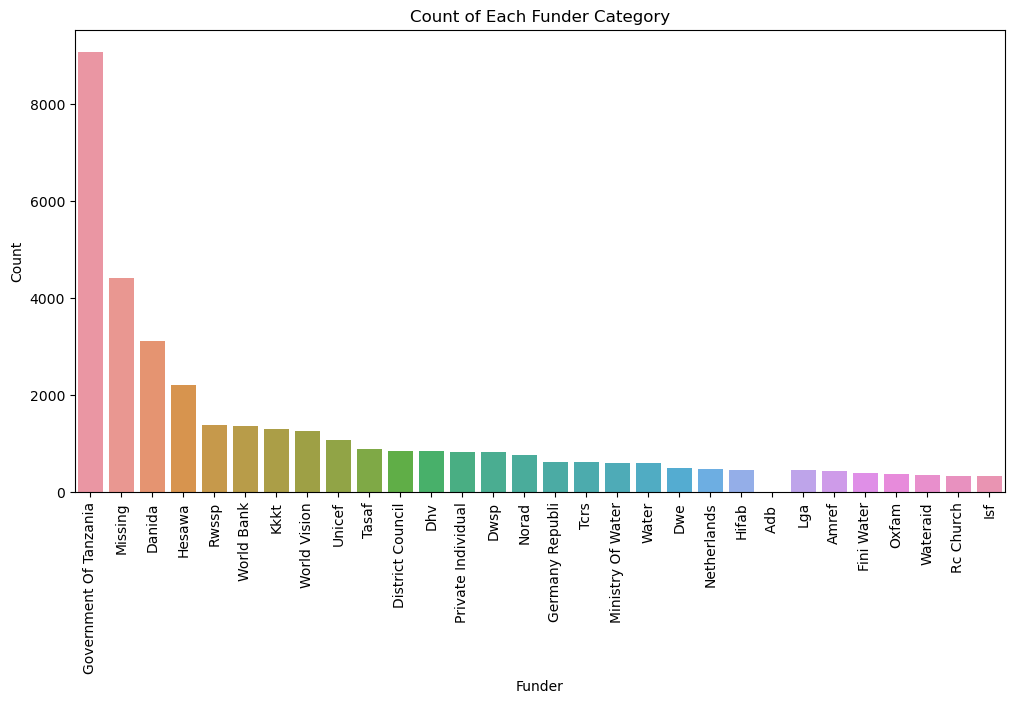

In [13]:
# Extract the funders and their respective counts then visualize them
funders = list(dfs.keys())
counts = [len(dfs[funder]) for funder in funders]

# Create a bar plot
plt.figure(figsize=(12, 6))
ax = sns.barplot(x=funders, y=counts)
ax.set_xticklabels(ax.get_xticklabels(), rotation=90)
plt.xlabel('Funder')
plt.ylabel('Count')
plt.title('Count of Each Funder Category')
plt.show()

The Government of Tanzania is the biggest Funder of Water wells in Tanzania. Most of the wells did not have information on who funded them while Danida, Hesawa, RWSSP and World Bank were second, third, fourth and fifth largest funders of the wells. 

## installer column
This column had alot of missing values as well. Therefore, i proceeded to investigate it. 

In [14]:
#checking for 100 unique values
df['installer'].value_counts().head(100)

DWE           17402
Government     1825
RWE            1206
Commu          1060
DANIDA         1050
              ...  
Missi            87
H                86
Shipo            86
AICT             84
DA               84
Name: installer, Length: 100, dtype: int64

There is a placeholder '0' count of 777 hence I replaced these with 'Missing' placeholder. I also filled other null values with 'Missing' placeholder.

In [15]:
df['installer'].replace(to_replace = '0', value ='missing' , inplace=True)
df['installer'].replace(to_replace = 'Not known', value ='missing' , inplace=True)
df['installer'].fillna(value='missing',inplace=True) 


I proceeded to check the most common values in order to identify any mispelling, missing values etc.

In [16]:
#Checking Most common values
unique_installers = df['installer'].unique()
print(unique_installers[:100])

['Roman' 'GRUMETI' 'World vision' 'UNICEF' 'Artisan' 'DWE' 'DWSP'
 'Water Aid' 'Private' 'DANIDA' 'Lawatefuka water sup' 'WEDECO' 'Danid'
 'TWE' 'ISF' 'Kilolo Star' 'District council' 'Water' 'WU' 'missing'
 'Central government' 'CEFA' 'Commu' 'Accra' 'World Vision' 'LGA' 'MUWSA'
 'KKKT _ Konde and DWE' 'Government' 'Olgilai village community' 'KKKT'
 'RWE' 'Adra /Community' 'SEMA' 'SHIPO' 'HESAWA' 'ACRA' 'Community' 'IFAD'
 'Sengerema Water Department' 'HE' 'ISF and TACARE' 'Kokeni' 'DA' 'Adra'
 'ALLYS' 'AICT' 'KIUMA' 'CES' 'District Counci' 'Ruthe' 'Adra/Community'
 'Tulawaka Gold Mine' 'KKT C' 'Hesawa' 'Water board' 'LOCAL CONTRACT'
 'WFP' 'LIPS' 'TASAF' 'World' 'SW' 'Shipo' 'Fini water' 'Kanisa' 'OXFARM'
 'VILLAGE COUNCIL Orpha' 'Villagers' 'Idara ya maji' 'FPCT' 'WVT' 'Ir'
 'DANID' 'Angli' 'secondary school' 'Amref' 'JBG' 'DADIS'
 'International Aid Services' 'RW' 'Dmdd' 'TCRS' 'RC Church' 'WATER AID'
 'JICA' 'Gwasco L' 'AF' 'AMREF' 'wananchi' 'FW' 'Central Government'
 'MWE &' 'G

In [17]:
unique_installers = df['installer'].unique()
print(unique_installers[:1000])

['Roman' 'GRUMETI' 'World vision' 'UNICEF' 'Artisan' 'DWE' 'DWSP'
 'Water Aid' 'Private' 'DANIDA' 'Lawatefuka water sup' 'WEDECO' 'Danid'
 'TWE' 'ISF' 'Kilolo Star' 'District council' 'Water' 'WU' 'missing'
 'Central government' 'CEFA' 'Commu' 'Accra' 'World Vision' 'LGA' 'MUWSA'
 'KKKT _ Konde and DWE' 'Government' 'Olgilai village community' 'KKKT'
 'RWE' 'Adra /Community' 'SEMA' 'SHIPO' 'HESAWA' 'ACRA' 'Community' 'IFAD'
 'Sengerema Water Department' 'HE' 'ISF and TACARE' 'Kokeni' 'DA' 'Adra'
 'ALLYS' 'AICT' 'KIUMA' 'CES' 'District Counci' 'Ruthe' 'Adra/Community'
 'Tulawaka Gold Mine' 'KKT C' 'Hesawa' 'Water board' 'LOCAL CONTRACT'
 'WFP' 'LIPS' 'TASAF' 'World' 'SW' 'Shipo' 'Fini water' 'Kanisa' 'OXFARM'
 'VILLAGE COUNCIL Orpha' 'Villagers' 'Idara ya maji' 'FPCT' 'WVT' 'Ir'
 'DANID' 'Angli' 'secondary school' 'Amref' 'JBG' 'DADIS'
 'International Aid Services' 'RW' 'Dmdd' 'TCRS' 'RC Church' 'WATER AID'
 'JICA' 'Gwasco L' 'AF' 'AMREF' 'wananchi' 'FW' 'Central Government'
 'MWE &' 'G

There were many mispelt names and I went ahead and imputed with the appropriate names from the unique 100 names 

In [18]:
df['installer'].replace(to_replace=('Central Government', 'Tanzania Government', 'central government',
                                    'Cental Government', 'Cebtral Government', 'Tanzanian Government',
                                    'Tanzania government', 'Centra Government', 'CENTRAL GOVERNMENT',
                                    'TANZANIAN GOVERNMENT', 'Central govt', 'Centr', 'Centra govt'),
                        value='Central government', inplace=True)

df['installer'].replace(to_replace=('Unisef', 'UNICEF'), value='Unicef', inplace=True)
df['installer'].replace(to_replace='DANID', value='DANIDA', inplace=True)


df['installer'].replace(to_replace=('villigers', 'villager', 'Villagers', 'Villa', 'Village', 'Villi',
                                    'Village Council', 'Village Counil', 'Villages', 'Vill', 'Village community',
                                    'Villaers', 'Village Community', 'Villag', 'Villege Council', 'Village council',
                                    'Village  Council', 'Villagerd', 'Villager', 'Village Technician',
                                    'Village Office', 'Village community members'),
                        value='villagers', inplace=True)


df['installer'].replace(to_replace=('World vision', 'World Division', 'World Vision'),
                        value='world vision', inplace=True)

df['installer'].replace(to_replace=('District Water Department', 'District water depar','W/' 'Distric Water Department'),
                        value='District water department', inplace=True)

df['installer'].replace(to_replace=('COUN', 'District COUNCIL', 'DISTRICT COUNCIL', 'District Counci',
                                    'District Council', 'Council', 'Counc', 'District  Council', 'Distri'),
                        value='District council', inplace=True)

df['installer'].replace(to_replace=('GOVERNMENT', 'GOVER', 'GOVERNME', 'GOVERM', 'GOVERN', 'Gover', 'Gove',
                                    'Governme', 'Governmen'), value='Government', inplace=True)

df['installer'].replace(to_replace='Hesawa', value='HESAWA', inplace=True)

df['installer'].replace(to_replace=('RC CHURCH', 'RC Churc', 'RC', 'RC Ch', 'RC C', 'RC CH', 'RC church',
                                    'RC CATHORIC'), value='RC Church', inplace=True)


df['installer'].replace(to_replace=('FinW', 'Fini water', 'FINI WATER'), value='Fini Water', inplace=True)

df['installer'].replace(to_replace='JAICA', value='Jaica', inplace=True)

df['installer'].replace(to_replace=('Commu', 'Communit', 'commu', 'COMMU', 'COMMUNITY'),
                        value='Community', inplace=True)


In [19]:
inspected_data = df['installer'].value_counts().head(100).sum()
installer_counts = df['installer'].value_counts().sum()
percentage_inspected = inspected_data / installer_counts
percentage_inspected

0.8321380471380472

I inspected 83% of the dataset. This was the most tedious column to inspect and hence with 83% of data inspected, i decided it was great to visualize it. 

## Visualize Top 30 Installers

In [20]:
df['installer'].value_counts().head(30)

DWE                   17402
missing                4449
Government             2660
Community              1674
DANIDA                 1602
HESAWA                 1379
RWE                    1206
District council       1179
Central government     1114
KKKT                    898
TCRS                    707
world vision            681
CES                     610
Fini Water              593
RC Church               461
villagers               408
LGA                     408
WEDECO                  397
TASAF                   396
Unicef                  332
AMREF                   329
TWESA                   316
WU                      301
Dmdd                    287
ACRA                    278
SEMA                    249
DW                      246
Jaica                   239
OXFAM                   234
Da                      224
Name: installer, dtype: int64

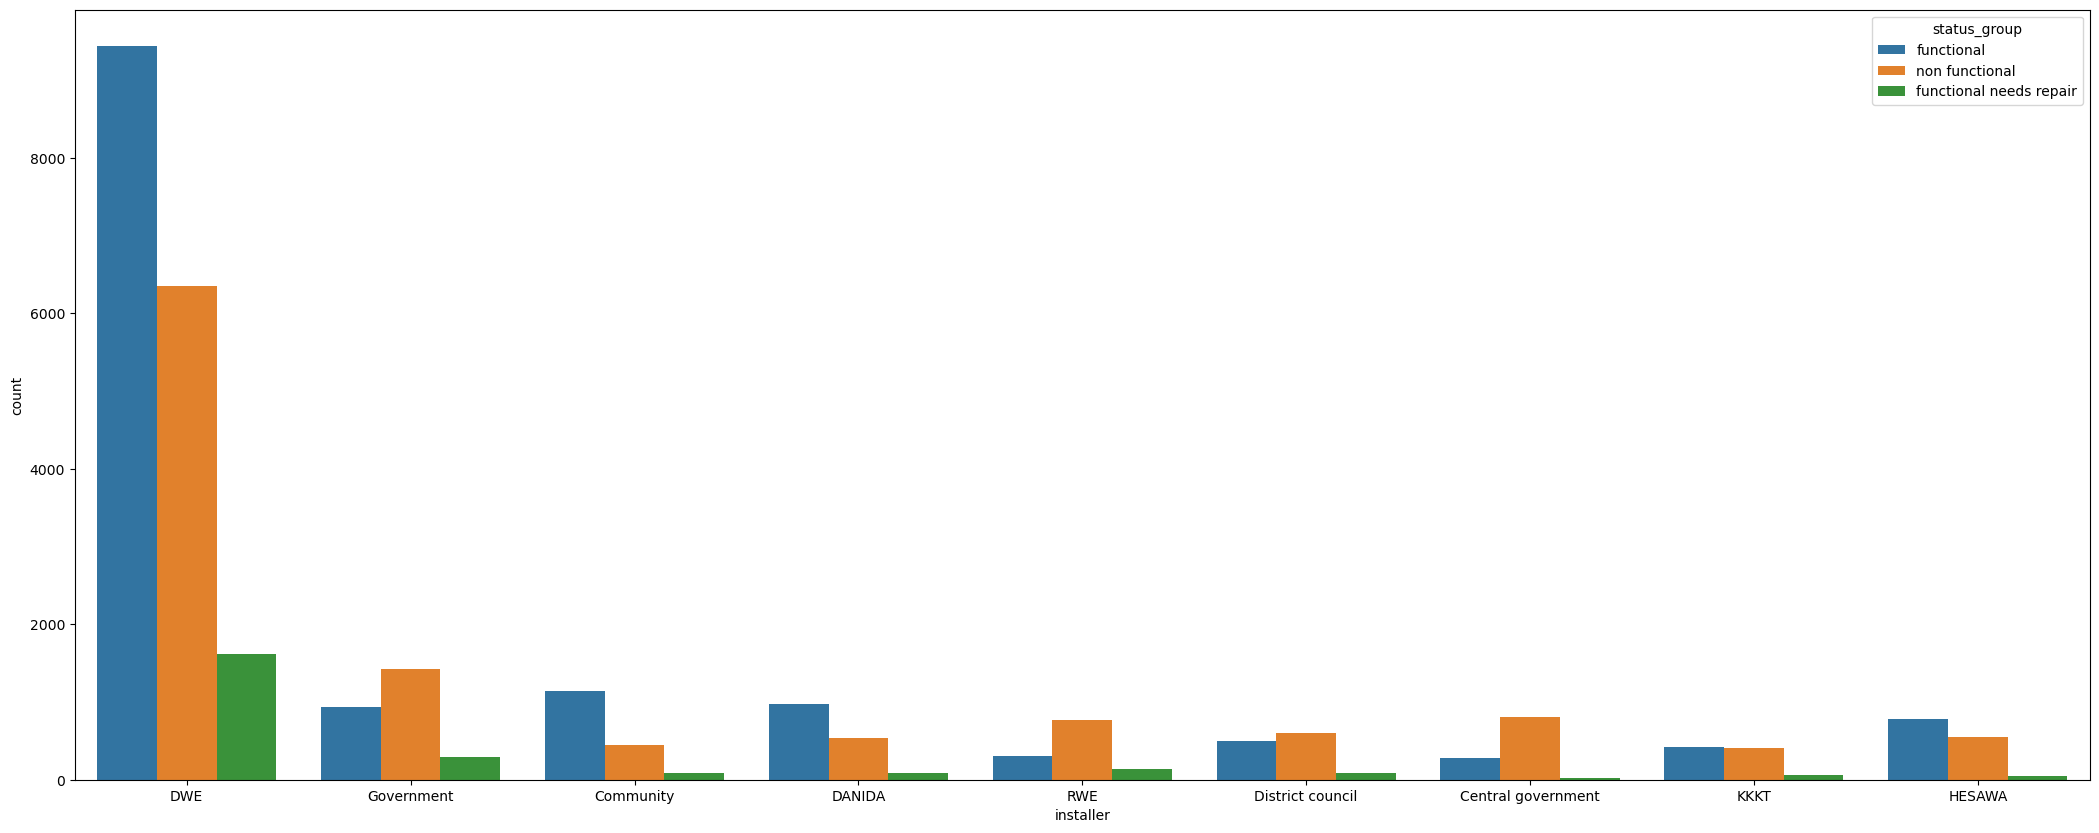

In [21]:
top_installers = ['DWE', 'Missing', 'Government', 'Community', 'DANIDA', 'RWE', 'District council',
                      'Central government', 'KKKT', 'HESAWA']

df_installer = pd.DataFrame()
for installer in top_installers:
    df_temp = df.loc[df['installer'] == installer]
    df_installer = pd.concat([df_installer, df_temp], ignore_index=True)

plt.figure(figsize=(26, 10))
ax = sns.countplot(x='installer', hue='status_group', data=df_installer)


DWE had the most functional wells, non functional wells and functionals wells that needs repair.

## Missing data in' public_meeting' & 'permit columns'

In [22]:
#Checking unique values
df['public_meeting'].value_counts()

True     51011
False     5055
Name: public_meeting, dtype: int64

In [23]:
# I filled the missing values with the most common count which represents 85% of the data
df['public_meeting'].fillna(value=True,inplace=True)

In [24]:
#checking unique values in 'permit' colum
df['permit'].value_counts()

True     38852
False    17492
Name: permit, dtype: int64

In [25]:
# I filled the missing values with the most common count which represents 65% of the data
df['permit'].fillna(value=True,inplace=True)

# 14. Dealing with columns that have similar data 
A closer inspection of the columns description reveals that some columns contain same information and we would need to drop some which have similar information. I started by investigating the following columns which had similar description;

1. scheme_management - Who operates the waterpoint
2. management - How the waterpoint is managed
3. management_group - How the waterpoint is managed


In [26]:

selected_columns = ['scheme_management', 'management', 'management_group']

# Get the value counts of the selected columns
value_counts = df[selected_columns].value_counts()
print(value_counts)

scheme_management  management   management_group
VWC                vwc          user-group          35388
WUG                wug          user-group           4768
WUA                wua          user-group           2369
Water Board        water board  user-group           2159
Parastatal         parastatal   parastatal           1568
                                                    ...  
Water Board        parastatal   parastatal              1
Private operator   wug          user-group              1
Trust              company      commercial              1
WUG                wua          user-group              1
Trust              parastatal   parastatal              1
Length: 85, dtype: int64


The columns 'scheme_management' and  'management' contain the same data, so i decided to drop 'scheme_management'  which contained high number of missing data and maintain the 'management' column. This would not affect the model.

In [27]:
#dropping scheme_management column
df.drop(columns=['scheme_management'],inplace=True )

In [28]:
# I decided to Investigate further the management_group column
df['management_group'].value_counts()

user-group    52490
commercial     3638
parastatal     1768
other           943
unknown         561
Name: management_group, dtype: int64

In [29]:
#User-group appears to have several subgroups hence I dediced to filter them
df.loc[df['management_group']=='user-group']['management'].value_counts() 

vwc            40507
wug             6515
water board     2933
wua             2535
Name: management, dtype: int64

I discovered that this sub-group was a grouped version of 'management' column since both columns contained the same information

In [30]:
# checking how many sub-groups we have in management group according to management column
df.groupby(['management_group','management']).count() 

id  amount_tsh  date_recorded  funder  \
management_group management                                                   
commercial       company             685         685            685     685   
                 private operator   1971        1971           1971    1971   
                 trust                78          78             78      78   
                 water authority     904         904            904     904   
other            other               844         844            844     844   
                 other - school       99          99             99      99   
parastatal       parastatal         1768        1768           1768    1768   
unknown          unknown             561         561            561     561   
user-group       vwc               40507       40507          40507   40507   
                 water board        2933        2933           2933    2933   
                 wua                2535        2535           2535    2535   
                 wug                6515        6515           6515    6515   

                                   gps_height  installer  longitude  latitude  \
management_group management                                                     
commercial       company                  685        685        685       685   
                 private operator        1971       1971       1971      1971   
                 trust                     78         78         78        78   
                 water authority          904        904        904       904   
other            other                    844        844        844       844   
                 other - school            99         99         99        99   
parastatal       parastatal              1768       1768       1768      1768   
unknown          unknown                  561        561        561       561   
user-group       vwc                    40507      40507      40507     40507   
                 water board             2933       2933       2933      2933   
                 wua                     2535       2535       2535      2535   
                 wug                     6515       6515       6515      6515   

                                   wpt_name  num_private  ...  water_quality  \
management_group management                               ...                  
commercial       company                685          685  ...            685   
                 private operator      1971         1971  ...           1971   
                 trust                   78           78  ...             78   
                 water authority        904          904  ...            904   
other            other                  844          844  ...            844   
                 other - school          99           99  ...             99   
parastatal       parastatal            1768         1768  ...           1768   
unknown          unknown                561          561  ...            561   
user-group       vwc                  40507        40507  ...          40507   
                 water board           2933         2933  ...           2933   
                 wua                   2535         2535  ...           2535   
                 wug                   6515         6515  ...           6515   

                                   quality_group  quantity  quantity_group  \
management_group management                                                  
commercial       company                     685       685             685   
                 private operator           1971      1971            1971   
                 trust                        78        78              78   
                 water authority             904       904             904   
other            other                       844       844             844   
                 other - school               99        99              99   
parastatal       parastatal                 1768   

In [31]:
# Since 'management' had more detailed data, I decided to drop 'management_group' column
df.drop(columns=['management_group'],inplace=True )

## 'Subvillage' column inspection


In [32]:
df['subvillage'].nunique()

19287

This column contained the geographic location value of water point regions. However, it had missing values and also since we already have region column, i decided to drop this column. This is because it would be impossible to impute missing data names of villages in tanzania. 

In [33]:
# dropping subvillage column
df.drop(columns=['subvillage'],inplace=True )


## 'Payment' columns
1. payment - What the water costs
2. payment_type - What the water costs
   
These two columns appeared to have the same information so I decided to investigate them.

In [34]:
df_payment = ['payment','payment_type']
value_counts = df[df_payment].value_counts()
print(value_counts)

payment                payment_type
never pay              never pay       25348
pay per bucket         per bucket       8985
pay monthly            monthly          8300
unknown                unknown          8157
pay when scheme fails  on failure       3914
pay annually           annually         3642
other                  other            1054
dtype: int64


The two columns contained the same information so i dropped the payment_type column and maintain the payment column since it was more detailed.

In [35]:
#Dropping the payment_type column
df.drop(columns=['payment_type'],inplace=True )


## 'water_quality' column
1. water_quality - The quality of the water
2. quality_group - The quality of the water

These two columns appeared to have the same information so I decided to investigate them.

In [36]:
df_quality = ['water_quality','quality_group']
value_counts = df[df_quality].value_counts()
print(value_counts)

water_quality       quality_group
soft                good             50818
salty               salty             4856
unknown             unknown           1876
milky               milky              804
coloured            colored            490
salty abandoned     salty              339
fluoride            fluoride           200
fluoride abandoned  fluoride            17
dtype: int64


The two columns contains the same information so i dropped the quality_group column and maintain the water_quality  since it was more detailed.


In [37]:
#Dropping the quality_group column
df.drop(columns=['quality_group'],inplace=True )

## 'quantity' and 'quantity_group' columns
1. quantity - The quantity of water
2. quantity_group - The quantity of water
These two columns appeared to have the same information so I decided to investigate them.

In [38]:
df_quantity = ['quantity','quantity_group']
value_counts = df[df_quantity].value_counts()
print(value_counts)

quantity      quantity_group
enough        enough            33186
insufficient  insufficient      15129
dry           dry                6246
seasonal      seasonal           4050
unknown       unknown             789
dtype: int64


The two columns contains the same information so i dropped the quantity_group column and maintained the quantity column  since it was more detailed.


In [39]:
#Dropping the quantity_group column
df.drop(columns=['quantity_group'],inplace=True )

## The 'source' , 'source_type' and 'source_class'
1. source - The source of the water
2. source_type - The source of the water
3. source_class - The source of the water

These three columns appeared to have the same information so I decided to investigate them.

In [40]:
df_source = ['source','source_type','source_class']
value_counts = df[df_source].value_counts()
print(value_counts)

source                source_type           source_class
spring                spring                groundwater     17021
shallow well          shallow well          groundwater     16824
machine dbh           borehole              groundwater     11075
river                 river/lake            surface          9612
rainwater harvesting  rainwater harvesting  surface          2295
hand dtw              borehole              groundwater       874
lake                  river/lake            surface           765
dam                   dam                   surface           656
other                 other                 unknown           212
unknown               other                 unknown            66
dtype: int64


In [41]:
df.groupby(['source_class','source']).count()

id  amount_tsh  date_recorded  funder  \
source_class source                                                           
groundwater  hand dtw                874         874            874     874   
             machine dbh           11075       11075          11075   11075   
             shallow well          16824       16824          16824   16824   
             spring                17021       17021          17021   17021   
surface      dam                     656         656            656     656   
             lake                    765         765            765     765   
             rainwater harvesting   2295        2295           2295    2295   
             river                  9612        9612           9612    9612   
unknown      other                   212         212            212     212   
             unknown                  66          66             66      66   

                                   gps_height  installer  longitude  latitude  \
source_class source                                                             
groundwater  hand dtw                     874        874        874       874   
             machine dbh                11075      11075      11075     11075   
             shallow well               16824      16824      16824     16824   
             spring                     17021      17021      17021     17021   
surface      dam                          656        656        656       656   
             lake                         765        765        765       765   
             rainwater harvesting        2295       2295       2295      2295   
             river                       9612       9612       9612      9612   
unknown      other                        212        212        212       212   
             unknown                       66         66         66        66   

                                   wpt_name  num_private  ...  \
source_class source                                       ...   
groundwater  hand dtw                   874          874  ...   
             machine dbh              11075        11075  ...   
             shallow well             16824        16824  ...   
             spring                   17021        17021  ...   
surface      dam                        656          656  ...   
             lake                       765          765  ...   
             rainwater harvesting      2295         2295  ...   
             river                     9612         9612  ...   
unknown      other                      212          212  ...   
             unknown                     66           66  ...   

                                   extraction_type_group  \
source_class source                                        
groundwater  hand dtw                                874   
             machine dbh                           11075   
             shallow well                          16824   
             spring                                17021   
surface      dam                                     656   
             lake                                    765   
             rainwater harvesting                   2295   
             river                                  9612   
unknown      other                                   212   
             unknown                                  66   

                                   extraction_type_class  management  payment  \
source_class source                                                             
groundwater  hand dtw                                874         874      874   
             machine dbh                           11075       11075    11075   
             shallow well                          16824       16824    16824   
             spring                                17021       17021    17021   
surface      dam                                     656         656      656   
             lake                              

The source_class column is a 'super_group' of the 'source' and 'source_type' columns, which contain the same set of information. Therefore, I decided to drop both the 'source_class' and 'source_type' and maintain the 'source' column which contains detailed information.

In [42]:
#Dropping the source_type & source_class columns 
df.drop(columns=['source_type','source_class'],inplace=True )

## The 'extraction_type', 'extraction_type_group' and 'extraction_type_class' 

1. extraction_type - The kind of extraction the waterpoint uses
2. extraction_type_group - The kind of extraction the waterpoint uses
3. extraction_type_class - The kind of extraction the waterpoint uses

These three columns appeared to have the same information so I decided to investigate them.

In [43]:
df_extraction = ['extraction_type','extraction_type_group','extraction_type_class']
value_counts = df[df_extraction].value_counts()
print(value_counts)

extraction_type            extraction_type_group  extraction_type_class
gravity                    gravity                gravity                  26780
nira/tanira                nira/tanira            handpump                  8154
other                      other                  other                     6430
submersible                submersible            submersible               4764
swn 80                     swn 80                 handpump                  3670
mono                       mono                   motorpump                 2865
india mark ii              india mark ii          handpump                  2400
afridev                    afridev                handpump                  1770
ksb                        submersible            submersible               1415
other - rope pump          rope pump              rope pump                  451
other - swn 81             other handpump         handpump                   229
windmill                   wind-power

These three columns contain same type of information. I decided to keep the 'extraction_type_group' and 'extraction_type_class' and drop the 'extraction_type'. Even though, extraction_type had more unique values, the details are small and would need to be group in a bigger sub class to derive any meanful information.  

In [44]:
#Dropping the sextraction_type column
df.drop(columns=['extraction_type'],inplace=True )

## The 'waterpoint_type' and  'waterpoint_type_group'
1. waterpoint_type - The kind of waterpoint
2. waterpoint_type_group - The kind of waterpoint
These two columns appeared to have the same information so I decided to investigate them.

In [45]:
df_waterpoint = ['waterpoint_type','waterpoint_type_group']
value_counts = df[df_waterpoint].value_counts()
print(value_counts)

waterpoint_type              waterpoint_type_group
communal standpipe           communal standpipe       28522
hand pump                    hand pump                17488
other                        other                     6380
communal standpipe multiple  communal standpipe        6103
improved spring              improved spring            784
cattle trough                cattle trough              116
dam                          dam                          7
dtype: int64


The two columns contains the same information so i dropped the 'waterpoint_type_group' column and maintained the 'waterpoint_type' column since it was more detailed.


In [46]:
#Dropping the source_type & source_class columns 
df.drop(columns=['waterpoint_type_group'],inplace=True )

# The 'wpt_name' and 'scheme_name'
1. wpt_name - Name of the waterpoint if there is one
2. scheme_name - Who operates the waterpoint
Scheme_name column has the highest number of missing values. Therefore i decided to investigate it against the water point name

In [47]:
df_name = ['wpt_name','scheme_name']
value_counts = df[df_name].value_counts()
print(value_counts)

wpt_name        scheme_name                   
none            Roman                             139
                DANIDA                             61
                Kit                                55
                Nzihi                              51
                Bomala                             48
                                                 ... 
Kwa Karoli      Kirua kahe pumping water trust      1
                Kaseke water project                1
Kwa Karo Ngesi  Mtikanga gravity Scheme             1
Kwa Karisto     Mkongoro One                        1
none            wanging'ombe water supply s         1
Length: 26241, dtype: int64


From the above information, scheme_name did not have any information about functionality of water wells and hence i dediced to drop the column and maintain the wtp_name column which can be used to identify various water points. Therefore, to deal with the large number of missing values, i dropped the column.


In [48]:
#Dropping the scheme_name columns 
df.drop(columns=['scheme_name'],inplace=True )

## 15. The Target Column Inspection

In [49]:
# Inspecting the Target Function
df['status_group'].value_counts()

functional                 32259
non functional             22824
functional needs repair     4317
Name: status_group, dtype: int64

There is a problem of class imbalance since the water wells that are functional  and need repair are very few while the functional wells were very high in number. To solve this problem, I decided to apply the class imbalance techniques such as SMOTE or Ensemble methods.

In [50]:
# confirming no more missing data and duplicated columns
df.isna().sum()

id                       0
amount_tsh               0
date_recorded            0
funder                   0
gps_height               0
installer                0
longitude                0
latitude                 0
wpt_name                 0
num_private              0
basin                    0
region                   0
region_code              0
district_code            0
lga                      0
ward                     0
population               0
public_meeting           0
recorded_by              0
permit                   0
construction_year        0
extraction_type_group    0
extraction_type_class    0
management               0
payment                  0
water_quality            0
quantity                 0
source                   0
waterpoint_type          0
status_group             0
dtype: int64

## 16. Describing the numerical columns

In [51]:
# Describe Dataset
df.describe()

,id,amount_tsh,gps_height,longitude,latitude,num_private,region_code,district_code,population,construction_year
count,59400.000000,59400.000000,59400.000000,59400.000000,5.940000e+04,59400.000000,59400.000000,59400.000000,59400.000000,59400.000000
mean,37115.131768,317.650385,668.297239,34.077427,-5.706033e+00,0.474141,15.297003,5.629747,179.909983,1300.652475
std,21453.128371,2997.574558,693.116350,6.567432,2.946019e+00,12.236230,17.587406,9.633649,471.482176,951.620547
min,0.000000,0.000000,-90.000000,0.000000,-1.164944e+01,0.000000,1.000000,0.000000,0.000000,0.000000
25%,18519.750000,0.000000,0.000000,33.090347,-8.540621e+00,0.000000,5.000000,2.000000,0.000000,0.000000
50%,37061.500000,0.000000,369.000000,34.908743,-5.021597e+00,0.000000,12.000000,3.000000,25.000000,1986.000000
75%,55656.500000,20.000000,1319.250000,37.178387,-3.326156e+00,0.000000,17.000000,5.000000,215.000000,2004.000000
max,74247.000000,350000.000000,2770.000000,40.345193,-2.000000e-08,1776.000000,99.000000,80.000000,30500.000000,2013.000000


## 17. Checking Other Irrelevant Columns & Initial Feature Engineering

In [52]:
# Finding unique value counts in each column
df = pd.DataFrame(df)

# Iterate over each column to get unique value counts
for column in df.columns:
    unique_counts = df[column].value_counts()
    print(f"Column: {column}")
    print(unique_counts)
    print()

Column: id
69572    1
27851    1
6924     1
61097    1
48517    1
        ..
59036    1
56446    1
3855     1
52786    1
26348    1
Name: id, Length: 59400, dtype: int64

Column: amount_tsh
0.0         41639
500.0        3102
50.0         2472
1000.0       1488
20.0         1463
            ...  
6300.0          1
120000.0        1
138000.0        1
350000.0        1
59.0            1
Name: amount_tsh, Length: 98, dtype: int64

Column: date_recorded
2011-03-15    572
2011-03-17    558
2013-02-03    546
2011-03-14    520
2011-03-16    513
             ... 
2011-09-11      1
2011-08-31      1
2011-09-21      1
2011-08-30      1
2013-12-01      1
Name: date_recorded, Length: 356, dtype: int64

Column: funder
Government Of Tanzania    9084
Missing                   4412
Danida                    3114
Hesawa                    2202
Rwssp                     1374
                          ... 
Rarymond Ekura               1
Justine Marwa                1
Municipal Council            1
Afdp  

## Dropping the 'recorded_by'  & 'region_code','num_private' columns

The 'recorded_by' column has only one  value and hence the column should  be dropped as it doesnt have any impact on the model. The 'region_code' column should be dropped since the region column is sufficient to capture the information contained in that column. The 'num_private' column has no description and most values are zeros, hence it should be dropped as the column cannot be interpreted. The 'construction_year' column can be engineered by grouping it into decades to produce more meaningful information. 

In [53]:
#Dropping the columns
df.drop(columns=['recorded_by','region_code','num_private'],inplace=True )

## Feature Engineering the 'construction_year' column

In [54]:
#Finding unique value counts of the column
df['construction_year'].value_counts()

0       20709
2010     2645
2008     2613
2009     2533
2000     2091
2007     1587
2006     1471
2003     1286
2011     1256
2004     1123
2012     1084
2002     1075
1978     1037
1995     1014
2005     1011
1999      979
1998      966
1990      954
1985      945
1980      811
1996      811
1984      779
1982      744
1994      738
1972      708
1974      676
1997      644
1992      640
1993      608
2001      540
1988      521
1983      488
1975      437
1986      434
1976      414
1970      411
1991      324
1989      316
1987      302
1981      238
1977      202
1979      192
1973      184
2013      176
1971      145
1960      102
1967       88
1963       85
1968       77
1969       59
1964       40
1962       30
1961       21
1965       19
1966       17
Name: construction_year, dtype: int64

There were many zero values and i dediced to replace them with the mean year

In [55]:

# Filter the DataFrame to exclude zero values
filtered_df = df[df['construction_year'] != 0]

# Calculate the mean of the filtered 'construction_year' column
mean_construction_year = np.mean(filtered_df['construction_year'])

# Round the mean to the nearest tens
rounded_mean_construction_year = round(mean_construction_year, -1)

# Convert the rounded mean to an integer
rounded_mean_construction_year = int(rounded_mean_construction_year)

print(rounded_mean_construction_year)


2000


In [56]:
# Replacing zero values with the mean year
df['construction_year'].replace(to_replace = 0, value = rounded_mean_construction_year, inplace=True)

In [57]:
# Mapping
df = pd.DataFrame(df) 

# dictionary to map the decades to their corresponding values
decade_mapping = {
    range(1960, 1970): '1960-70',
    range(1970, 1980): '1970-80',
    range(1980, 1990): '1980-90',
    range(1990, 2000): '1990-2000',
    range(2000, 2010): '2000-2010',
    range(2010, 2014): '2010-'
}

# Replace the 'construction_year' column 
df['construction_year'] = df['construction_year'].replace(decade_mapping)



In [58]:
# Grouping by 'quantity','water_quality' and 'status_group' columns
df.groupby(['quantity','water_quality','status_group']).count().head(50)

id  amount_tsh  \
quantity     water_quality      status_group                                 
dry          coloured           functional needs repair      1           1   
                                non functional              28          28   
             fluoride           non functional               2           2   
             fluoride abandoned non functional               2           2   
             milky              non functional             119         119   
             salty              functional                  11          11   
                                functional needs repair      1           1   
                                non functional             638         638   
             salty abandoned    functional                   1           1   
                                non functional              12          12   
             soft               functional                 136         136   
                                functional needs repair     19          19   
                                non functional            4272        4272   
             unknown            functional                   9           9   
                                functional needs repair     16          16   
                                non functional             979         979   
enough       coloured           functional                 107         107   
                                functional needs repair     11          11   
                                non functional              53          53   
             fluoride           functional                  66          66   
                                functional needs repair      9           9   
                                non functional               9           9   
             fluoride abandoned functional                   5           5   
                                non functional               6           6   
             milky              functional                 246         246   
                                functional needs repair      9           9   
                                non functional              81          81   
             salty              functional                1373        1373   
                                functional needs repair     89          89   
                                non functional             834         834   
             salty abandoned    functional                 150         150   
                                functional needs repair     50          50   
                                non functional              56          56   
             soft               functional               19640       19640   
                                functional needs repair   2226        2226   
                                non functional            8035        8035   
             unknown            functional                  61          61   
                                functional needs repair      6           6   
                                non functional              64          64   
insufficient coloured           functional                  91          91   
                                functional needs repair     13          13   
                                non functional              66          66   
             fluoride           functional                  85          85   
                                functional needs repair      4           4   
                                non functional              25          25   
             fluoride abandoned functional                   1           1   
                                non functional               3           3   
             milky              functional                 118         118   
                                functional needs repair      4           4   
                                non functional              91          91   

   

## 18. Visualization of Target vs Selected Features

## 19. Visualizations using GeoPandas

In [59]:
import warnings

# Filter out the FutureWarning from pyproj
warnings.filterwarnings("ignore", category=FutureWarning)

# Creating Coordinate system based on lat/long and mapping new geometry column
crs = {'init': 'epsg:4326'} 
geometry = [Point(xy) for xy in zip(df['longitude'],df['latitude'])]
geopandas_df = gpd.GeoDataFrame(df,
                          crs = crs,
                          geometry=geometry)
geopandas_df.head()


,id,amount_tsh,date_recorded,funder,gps_height,installer,longitude,latitude,wpt_name,basin,...,extraction_type_group,extraction_type_class,management,payment,water_quality,quantity,source,waterpoint_type,status_group,geometry
0,69572,6000.0,2011-03-14,Roman,1390,Roman,34.938093,-9.856322,none,Lake Nyasa,...,gravity,gravity,vwc,pay annually,soft,enough,spring,communal standpipe,functional,POINT (34.93809 -9.85632)
1,8776,0.0,2013-03-06,Grumeti,1399,GRUMETI,34.698766,-2.147466,Zahanati,Lake Victoria,...,gravity,gravity,wug,never pay,soft,insufficient,rainwater harvesting,communal standpipe,functional,POINT (34.69877 -2.14747)
2,34310,25.0,2013-02-25,Lottery Club,686,world vision,37.460664,-3.821329,Kwa Mahundi,Pangani,...,gravity,gravity,vwc,pay per bucket,soft,enough,dam,communal standpipe multiple,functional,POINT (37.46066 -3.82133)
3,67743,0.0,2013-01-28,Unicef,263,Unicef,38.486161,-11.155298,Zahanati Ya Nanyumbu,Ruvuma / Southern Coast,...,submersible,submersible,vwc,never pay,soft,dry,machine dbh,communal standpipe multiple,non functional,POINT (38.48616 -11.15530)
4,19728,0.0,2011-07-13,Action In A,0,Artisan,31.130847,-1.825359,Shuleni,Lake Victoria,...,gravity,gravity,other,never pay,soft,seasonal,rainwater harvesting,communal standpipe,functional,POINT (31.13085 -1.82536)


In [60]:
#Creating a function to define X,y coordinates from points
def getPointCoords(row, geom, coord_type):
    if coord_type == 'x':
        return row[geom].x
    elif coord_type == 'y':
        return row[geom].y

In [61]:
# Calculate x coordinates
geopandas_df['x'] = geopandas_df.apply(getPointCoords, geom='geometry', coord_type='x', axis=1)

# Calculate y coordinates
geopandas_df['y'] = geopandas_df.apply(getPointCoords, geom='geometry', coord_type='y', axis=1)

#checking the new columns X and y
geopandas_df.head()

,id,amount_tsh,date_recorded,funder,gps_height,installer,longitude,latitude,wpt_name,basin,...,management,payment,water_quality,quantity,source,waterpoint_type,status_group,geometry,x,y
0,69572,6000.0,2011-03-14,Roman,1390,Roman,34.938093,-9.856322,none,Lake Nyasa,...,vwc,pay annually,soft,enough,spring,communal standpipe,functional,POINT (34.93809 -9.85632),34.938093,-9.856322
1,8776,0.0,2013-03-06,Grumeti,1399,GRUMETI,34.698766,-2.147466,Zahanati,Lake Victoria,...,wug,never pay,soft,insufficient,rainwater harvesting,communal standpipe,functional,POINT (34.69877 -2.14747),34.698766,-2.147466
2,34310,25.0,2013-02-25,Lottery Club,686,world vision,37.460664,-3.821329,Kwa Mahundi,Pangani,...,vwc,pay per bucket,soft,enough,dam,communal standpipe multiple,functional,POINT (37.46066 -3.82133),37.460664,-3.821329
3,67743,0.0,2013-01-28,Unicef,263,Unicef,38.486161,-11.155298,Zahanati Ya Nanyumbu,Ruvuma / Southern Coast,...,vwc,never pay,soft,dry,machine dbh,communal standpipe multiple,non functional,POINT (38.48616 -11.15530),38.486161,-11.155298
4,19728,0.0,2011-07-13,Action In A,0,Artisan,31.130847,-1.825359,Shuleni,Lake Victoria,...,other,never pay,soft,seasonal,rainwater harvesting,communal standpipe,functional,POINT (31.13085 -1.82536),31.130847,-1.825359


In [62]:
#dropping the row with 0.0 as X coord
remove = geopandas_df['x'] != 0.0
geomapped_df = geopandas_df[remove]
geomapped_df.head()

,id,amount_tsh,date_recorded,funder,gps_height,installer,longitude,latitude,wpt_name,basin,...,management,payment,water_quality,quantity,source,waterpoint_type,status_group,geometry,x,y
0,69572,6000.0,2011-03-14,Roman,1390,Roman,34.938093,-9.856322,none,Lake Nyasa,...,vwc,pay annually,soft,enough,spring,communal standpipe,functional,POINT (34.93809 -9.85632),34.938093,-9.856322
1,8776,0.0,2013-03-06,Grumeti,1399,GRUMETI,34.698766,-2.147466,Zahanati,Lake Victoria,...,wug,never pay,soft,insufficient,rainwater harvesting,communal standpipe,functional,POINT (34.69877 -2.14747),34.698766,-2.147466
2,34310,25.0,2013-02-25,Lottery Club,686,world vision,37.460664,-3.821329,Kwa Mahundi,Pangani,...,vwc,pay per bucket,soft,enough,dam,communal standpipe multiple,functional,POINT (37.46066 -3.82133),37.460664,-3.821329
3,67743,0.0,2013-01-28,Unicef,263,Unicef,38.486161,-11.155298,Zahanati Ya Nanyumbu,Ruvuma / Southern Coast,...,vwc,never pay,soft,dry,machine dbh,communal standpipe multiple,non functional,POINT (38.48616 -11.15530),38.486161,-11.155298
4,19728,0.0,2011-07-13,Action In A,0,Artisan,31.130847,-1.825359,Shuleni,Lake Victoria,...,other,never pay,soft,seasonal,rainwater harvesting,communal standpipe,functional,POINT (31.13085 -1.82536),31.130847,-1.825359


## 20. Importing  Geographical data 

In [63]:
TZ = gpd.read_file('tanzania.csv')

 Importing Tanzania Geographical data on health centres which helps map the geometry points generated

## 21. Mapping Waterpoints by Function

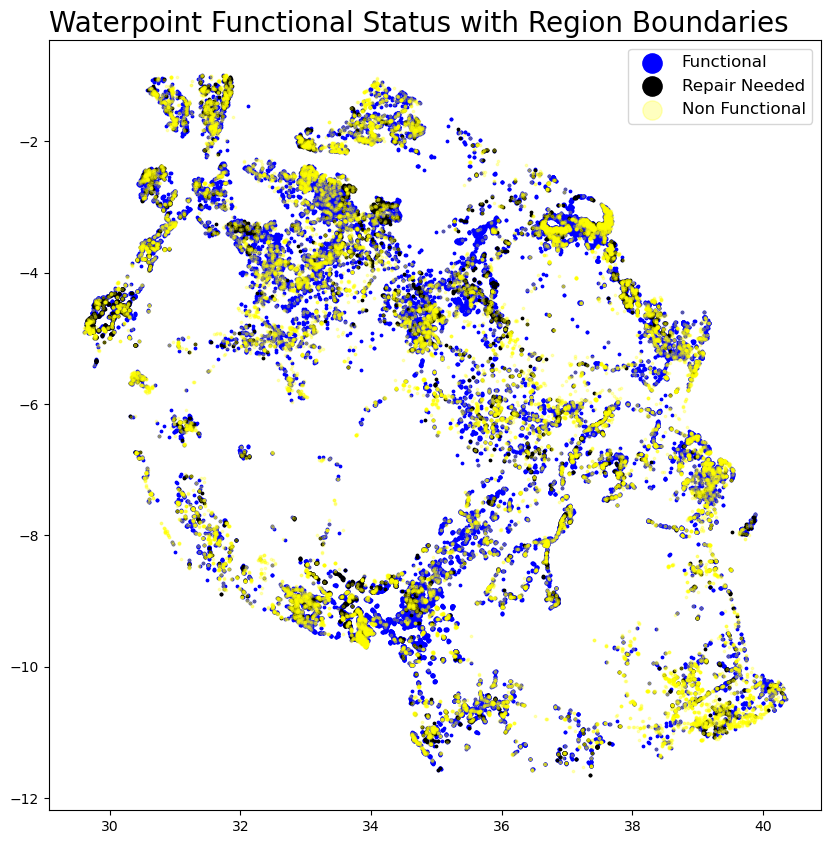

In [64]:
fig, ax = plt.subplots(1, 1, figsize=(10, 10))

# Plotting Tanzania map with boundaries
TZ.plot(ax=ax, alpha=0.5, color='grey', linewidth=2, edgecolor='black')

# Plotting functional waterpoints
geomapped_df[geomapped_df['status_group'] == 'functional'].plot(ax=ax, markersize=3, color='Blue', marker='o', label='Functional')

# Plotting waterpoints needing repair
geomapped_df[geomapped_df['status_group'] == 'functional needs repair'].plot(ax=ax, markersize=3, color='Black', marker='o', label='Repair Needed')

# Plotting non-functional waterpoints
geomapped_df[geomapped_df['status_group'] == 'non functional'].plot(ax=ax, markersize=3, alpha=0.25, color='Yellow', marker='o', label='Non Functional')

# Turn on axis
ax.axis('on')

# Add legend
plt.legend(loc='upper right', fontsize='12', markerscale=8)

# Add title
plt.title('Waterpoint Functional Status with Region Boundaries', loc='left', fontsize=20)

# Save the figure
plt.savefig('waterpoints_by_function_map_with_boundaries.png', bbox_inches='tight')

# Show the plot
plt.show()


## 22. Well Functionality by Management

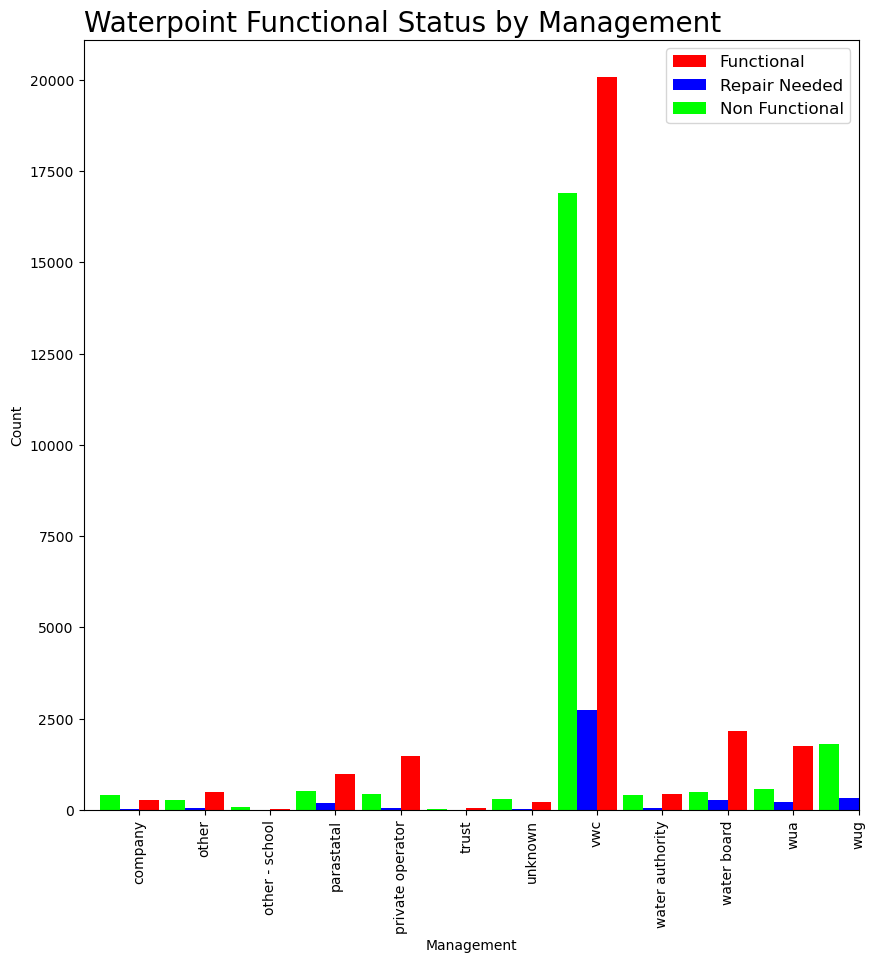

In [65]:

# Group the data by management and status_group
grouped_df = geomapped_df.groupby(['management', 'status_group']).size().unstack().fillna(0)

# Create a figure and axis
fig, ax = plt.subplots(1, 1, figsize=(10, 10))

# Plotting functional waterpoints
grouped_df['functional'].plot(ax=ax, kind='bar', color='#FF0000', width=0.3, position=0, label='Functional')

# Plotting waterpoints needing repair
grouped_df['functional needs repair'].plot(ax=ax, kind='bar', color='#0000FF', width=0.3, position=1, label='Repair Needed')

# Plotting non-functional waterpoints
grouped_df['non functional'].plot(ax=ax, kind='bar', color='#00FF00', width=0.3, position=2, label='Non Functional')

# Add legend
plt.legend(loc='upper right', fontsize='12', markerscale=8)

# Add title and labels
plt.title('Waterpoint Functional Status by Management', loc='left', fontsize=20)
plt.xlabel('Management')
plt.ylabel('Count')

# Rotate x-axis labels for better visibility if needed
plt.xticks(rotation=90)

# Save the figure
plt.savefig('status_group_by_management.png', bbox_inches='tight')

# Show the plot
plt.show()


Waterpoints management by vwc had the highest number of functional, non functional and functional but need repair wells. That management type also managed highest number of water wells.

## 23. Mapping the status of wells by Level of water quantity

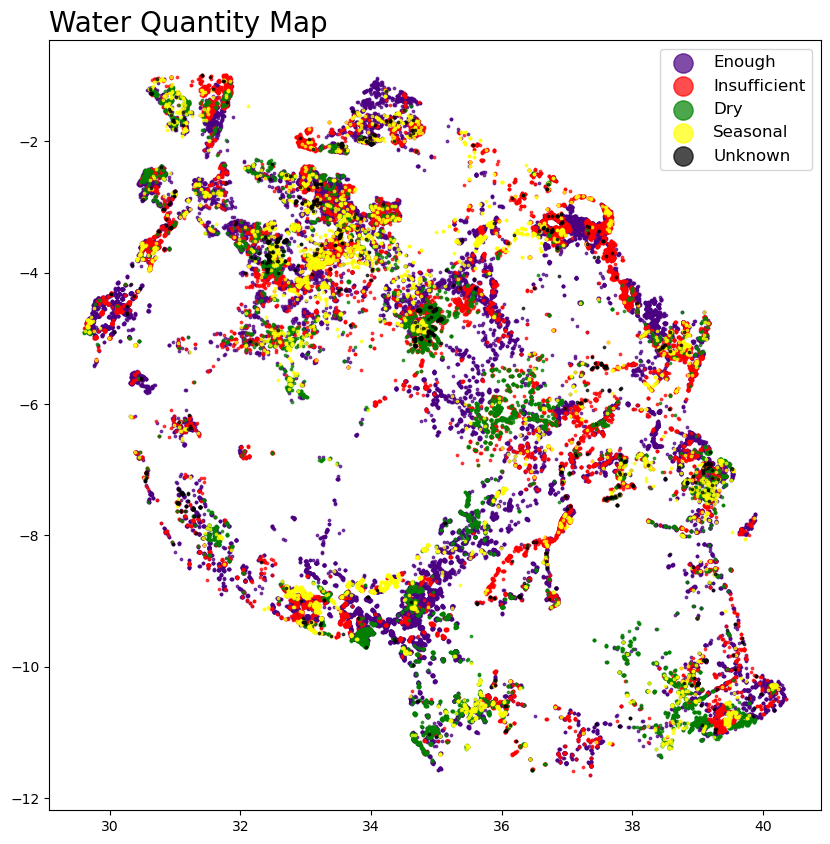

In [66]:
fig, ax = plt.subplots(1, 1, figsize=(10, 10))

# Plotting Tanzania map with boundaries
TZ.boundary.plot(ax=ax, color='grey', linewidth=2)

# Plotting waterpoints with enough quantity
geomapped_df[geomapped_df['quantity'] == 'enough'].plot(ax=ax, markersize=3, alpha=0.7, color='indigo', marker='o', label='Enough')

# Plotting waterpoints with insufficient quantity
geomapped_df[geomapped_df['quantity'] == 'insufficient'].plot(ax=ax, markersize=3, alpha=0.7, color='red', marker='o', label='Insufficient')

# Plotting dry waterpoints
geomapped_df[geomapped_df['quantity'] == 'dry'].plot(ax=ax, markersize=3, alpha=0.7, color='green', marker='o', label='Dry')

# Plotting waterpoints with seasonal quantity
geomapped_df[geomapped_df['quantity'] == 'seasonal'].plot(ax=ax, markersize=3, alpha=0.7, color='yellow', marker='o', label='Seasonal')

# Plotting waterpoints with unknown quantity
geomapped_df[geomapped_df['quantity'] == 'unknown'].plot(ax=ax, markersize=3, alpha=0.7, color='black', marker='o', label='Unknown')

# Turn on axis
ax.axis('on')

# Add legend
plt.legend(loc='upper right', fontsize=12, markerscale=8)

# Add title
plt.title('Water Quantity Map', loc='left', fontsize=20)

# Save the figure
plt.savefig('water_quantity_map.png', bbox_inches='tight')

# Show the plot
plt.show()


Most wells appeared to have enough water quantity. A few had unknown water quantity whle seasonal wells are the highest. Seasonal wells are mostly distributed in north while dry wells are mostly in central and south parts of Tanzania

## 24. Waterpoint functional status by Basin

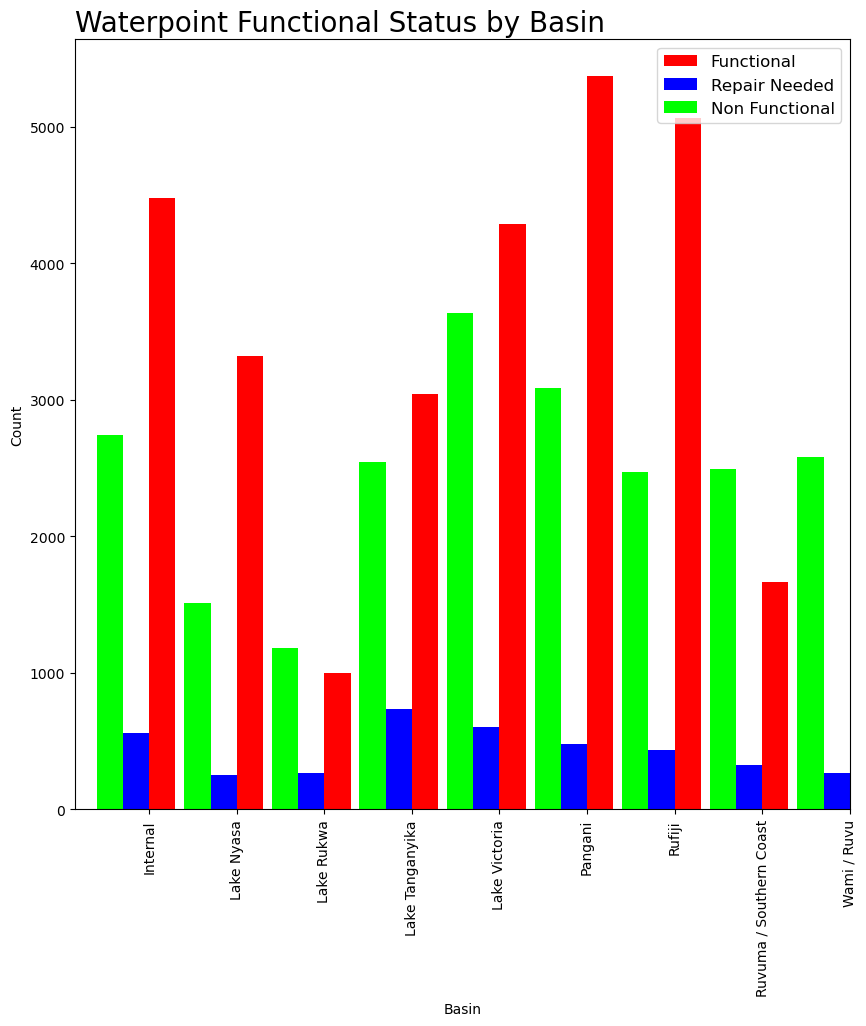

In [67]:

# Group the data by basin and status_group
grouped_df = geomapped_df.groupby(['basin', 'status_group']).size().unstack().fillna(0)

# Create a figure and axis
fig, ax = plt.subplots(1, 1, figsize=(10, 10))

# Plotting functional waterpoints
grouped_df['functional'].plot(ax=ax, kind='bar', color='#FF0000', width=0.3, position=0, label='Functional')

# Plotting waterpoints needing repair
grouped_df['functional needs repair'].plot(ax=ax, kind='bar', color='#0000FF', width=0.3, position=1, label='Repair Needed')

# Plotting non-functional waterpoints
grouped_df['non functional'].plot(ax=ax, kind='bar', color='#00FF00', width=0.3, position=2, label='Non Functional')

# Add legend
plt.legend(loc='upper right', fontsize='12', markerscale=8)

# Add title and labels
plt.title('Waterpoint Functional Status by Basin', loc='left', fontsize=20)
plt.xlabel('Basin')
plt.ylabel('Count')

# Rotate x-axis labels for better visibility if needed
plt.xticks(rotation=90)

# Save the figure
plt.savefig('status_group_by_basin.png', bbox_inches='tight')

# Show the plot
plt.show()


Pangani, Rufiji, Lake Victoria, Lake Tanganyika and Internal Basins have the highest number of functional water wells

## 25. Mapping WaterPoint Type Map

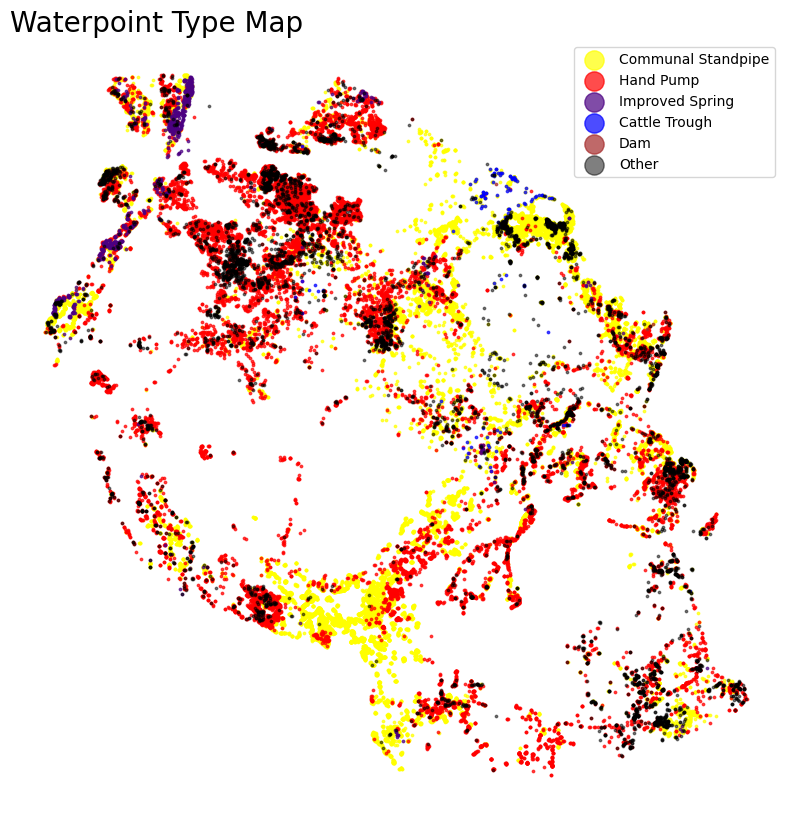

In [68]:
fig, ax = plt.subplots(1, 1, figsize=(10, 10))

# Plotting Tanzania map with boundaries
TZ.boundary.plot(ax=ax, color='grey', linewidth=2)

# Plotting communal standpipe waterpoints
geomapped_df[geomapped_df['waterpoint_type'] == 'communal standpipe'].plot(ax=ax, markersize=3, alpha=0.7, color='yellow', marker='o', label='Communal Standpipe')

# Plotting hand pump waterpoints
geomapped_df[geomapped_df['waterpoint_type'] == 'hand pump'].plot(ax=ax, markersize=3, alpha=0.7, color='red', marker='o', label='Hand Pump')

# Plotting improved spring waterpoints
geomapped_df[geomapped_df['waterpoint_type'] == 'improved spring'].plot(ax=ax, markersize=3, alpha=0.7, color='indigo', marker='o', label='Improved Spring')

# Plotting cattle trough waterpoints
geomapped_df[geomapped_df['waterpoint_type'] == 'cattle trough'].plot(ax=ax, markersize=3, alpha=0.7, color='blue', marker='o', label='Cattle Trough')

# Plotting dam waterpoints
geomapped_df[geomapped_df['waterpoint_type'] == 'dam'].plot(ax=ax, markersize=3, alpha=0.7, color='brown', marker='o', label='Dam')

# Plotting other waterpoints
geomapped_df[geomapped_df['waterpoint_type'] == 'other'].plot(ax=ax, markersize=3, alpha=0.5, color='black', marker='o', label='Other')

# Turn off axis
ax.axis('off')

# Add legend
plt.legend(loc='upper right', fontsize=10, markerscale=8)

# Add title
plt.title('Waterpoint Type Map', loc='left', fontsize=20)

# Save the figure
plt.savefig('waterpoint_type_map.png', bbox_inches='tight')

# Show the plot
plt.show()


Communical standpipe are mostly distributed in southwest and eastern parts while handpumps are mostly in the north parts.

## 26. Mapping Well sources

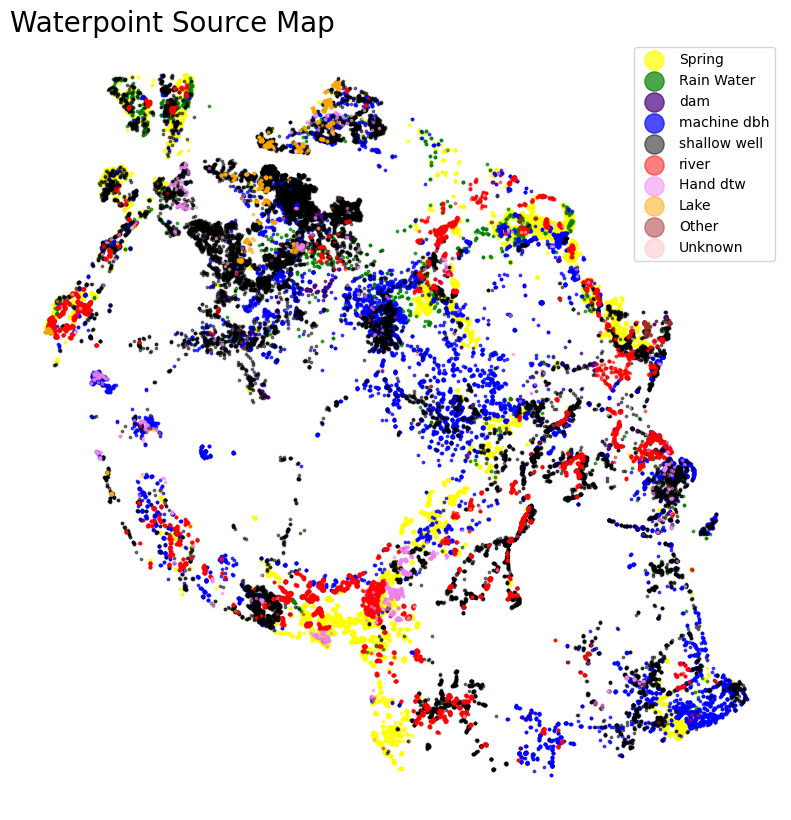

In [69]:
fig, ax = plt.subplots(1, 1, figsize=(10, 10))

# Plotting Tanzania map with boundaries
TZ.boundary.plot(ax=ax, color='grey', linewidth=2)

# Plotting spring sources
geomapped_df[geomapped_df['source'] == 'spring'].plot(ax=ax, markersize=3, alpha=0.7, color='yellow', marker='o', label='Spring')

# Plotting rainwater harvesting source
geomapped_df[geomapped_df['source'] == 'rainwater harvesting'].plot(ax=ax, markersize=3, alpha=0.7, color='green', marker='o', label='Rain Water')

# Plotting dam sources
geomapped_df[geomapped_df['source'] == 'dam'].plot(ax=ax, markersize=3, alpha=0.7, color='indigo', marker='o', label='dam')

# Plotting machine dbh sources
geomapped_df[geomapped_df['source'] == 'machine dbh'].plot(ax=ax, markersize=3, alpha=0.7, color='blue', marker='o', label='machine dbh')

# Plotting shallow well source
geomapped_df[geomapped_df['source'] == 'shallow well'].plot(ax=ax, markersize=3, alpha=0.5, color='black', marker='o', label='shallow well')

# Plotting river sources
geomapped_df[geomapped_df['source'] == 'river'].plot(ax=ax, markersize=3, alpha=0.5, color='red', marker='o', label='river')

# Plotting hand dtw
geomapped_df[geomapped_df['source'] == 'hand dtw'].plot(ax=ax, markersize=3, alpha=0.5, color='violet', marker='o', label='Hand dtw')

# Plotting lake sources
geomapped_df[geomapped_df['source'] == 'lake'].plot(ax=ax, markersize=3, alpha=0.5, color='orange', marker='o', label='Lake')

# Plotting other sources
geomapped_df[geomapped_df['source'] == 'other'].plot(ax=ax, markersize=3, alpha=0.5, color='brown', marker='o', label='Other')

# Plotting unknown
geomapped_df[geomapped_df['source'] == 'unknown'].plot(ax=ax, markersize=3, alpha=0.5, color='pink', marker='o', label='Unknown')

# Turn off axis
ax.axis('off')

# Add legend
plt.legend(loc='upper right', fontsize=10, markerscale=8)

# Add title
plt.title('Waterpoint Source Map', loc='left', fontsize=20)

# Save the figure
plt.savefig('waterpoint_source_map.png', bbox_inches='tight')

# Show the plot
plt.show()


Most wells are machine boreholes especially in north and south east parts. The spring wells are most found in southwest parts of tanzania

In [70]:
unique_sources = geomapped_df['payment'].unique()
print(unique_sources)

['pay annually' 'never pay' 'pay per bucket' 'unknown'
 'pay when scheme fails' 'other' 'pay monthly']


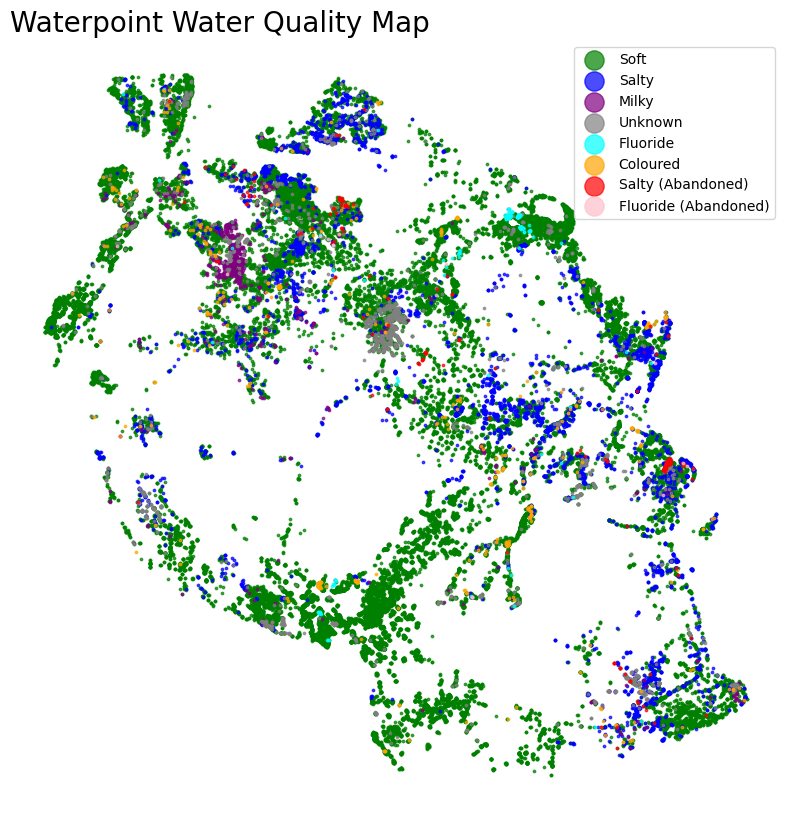

In [71]:
fig, ax = plt.subplots(1, 1, figsize=(10, 10))

# Plotting Tanzania map with boundaries
TZ.boundary.plot(ax=ax, color='grey', linewidth=2)

# Plotting soft water quality
geomapped_df[geomapped_df['water_quality'] == 'soft'].plot(ax=ax, markersize=3, alpha=0.7, color='green', marker='o', label='Soft')

# Plotting salty water quality
geomapped_df[geomapped_df['water_quality'] == 'salty'].plot(ax=ax, markersize=3, alpha=0.7, color='blue', marker='o', label='Salty')

# Plotting milky water quality
geomapped_df[geomapped_df['water_quality'] == 'milky'].plot(ax=ax, markersize=3, alpha=0.7, color='purple', marker='o', label='Milky')

# Plotting unknown water quality
geomapped_df[geomapped_df['water_quality'] == 'unknown'].plot(ax=ax, markersize=3, alpha=0.7, color='gray', marker='o', label='Unknown')

# Plotting fluoride water quality
geomapped_df[geomapped_df['water_quality'] == 'fluoride'].plot(ax=ax, markersize=3, alpha=0.7, color='cyan', marker='o', label='Fluoride')

# Plotting coloured water quality
geomapped_df[geomapped_df['water_quality'] == 'coloured'].plot(ax=ax, markersize=3, alpha=0.7, color='orange', marker='o', label='Coloured')

# Plotting salty abandoned water quality
geomapped_df[geomapped_df['water_quality'] == 'salty abandoned'].plot(ax=ax, markersize=3, alpha=0.7, color='red', marker='o', label='Salty (Abandoned)')

# Plotting fluoride abandoned water quality
geomapped_df[geomapped_df['water_quality'] == 'fluoride abandoned'].plot(ax=ax, markersize=3, alpha=0.7, color='pink', marker='o', label='Fluoride (Abandoned)')

# Turn off axis
ax.axis('off')

# Add legend
plt.legend(loc='upper right', fontsize=10, markerscale=8)

# Add title
plt.title('Waterpoint Water Quality Map', loc='left', fontsize=20)

# Save the figure
plt.savefig('waterpoint_water_quality_map.png', bbox_inches='tight')

# Show the plot
plt.show()


Most wells are soft, and this trend is consistent for machine dug boreholes. Few wells are salty and abandoned. 

## 27. Waterpoint Payment Type Mapping

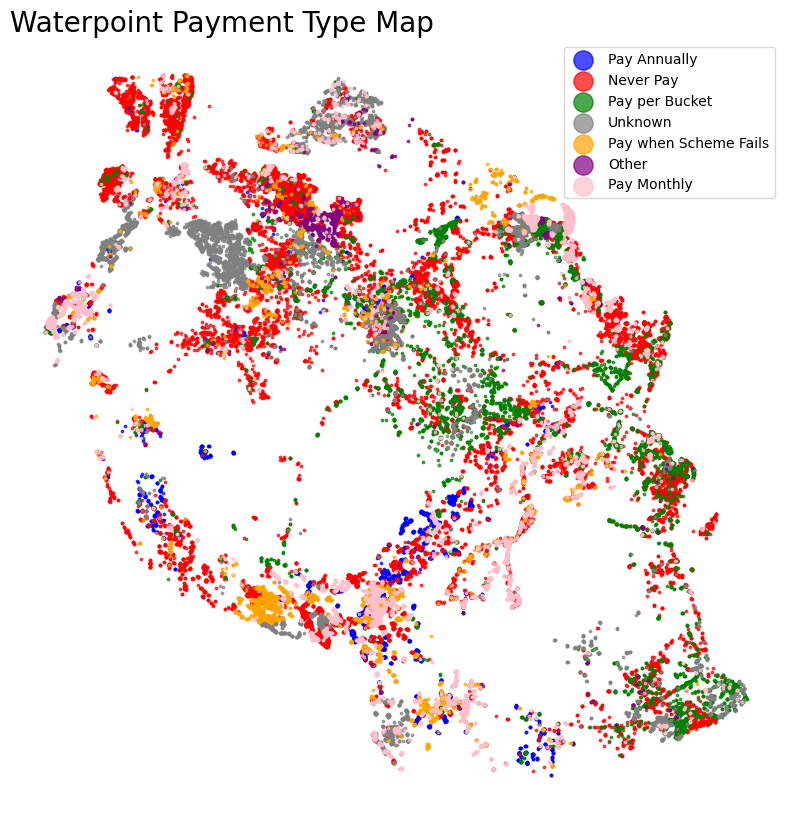

In [72]:
fig, ax = plt.subplots(1, 1, figsize=(10, 10))

# Plotting Tanzania map with boundaries
TZ.boundary.plot(ax=ax, color='grey', linewidth=2)

# Plotting "pay annually" payments
geomapped_df[geomapped_df['payment'] == 'pay annually'].plot(ax=ax, markersize=3, alpha=0.7, color='blue', marker='o', label='Pay Annually')

# Plotting "never pay" payments
geomapped_df[geomapped_df['payment'] == 'never pay'].plot(ax=ax, markersize=3, alpha=0.7, color='red', marker='o', label='Never Pay')

# Plotting "pay per bucket" payments
geomapped_df[geomapped_df['payment'] == 'pay per bucket'].plot(ax=ax, markersize=3, alpha=0.7, color='green', marker='o', label='Pay per Bucket')

# Plotting "unknown" payments
geomapped_df[geomapped_df['payment'] == 'unknown'].plot(ax=ax, markersize=3, alpha=0.7, color='grey', marker='o', label='Unknown')

# Plotting "pay when scheme fails" payments
geomapped_df[geomapped_df['payment'] == 'pay when scheme fails'].plot(ax=ax, markersize=3, alpha=0.7, color='orange', marker='o', label='Pay when Scheme Fails')

# Plotting "other" payments
geomapped_df[geomapped_df['payment'] == 'other'].plot(ax=ax, markersize=3, alpha=0.7, color='purple', marker='o', label='Other')

# Plotting "pay monthly" payments
geomapped_df[geomapped_df['payment'] == 'pay monthly'].plot(ax=ax, markersize=3, alpha=0.7, color='pink', marker='o', label='Pay Monthly')

# Turn off axis
ax.axis('off')

# Add legend
plt.legend(loc='upper right', fontsize=10, markerscale=8)

# Add title
plt.title('Waterpoint Payment Type Map', loc='left', fontsize=20)

# Save the figure
plt.savefig('waterpoint_payment_type_map.png', bbox_inches='tight')

# Show the plot
plt.show()


Most wells are never pay schemes and pay monthly schemes

## 28. Visualizating Other Categorical columns

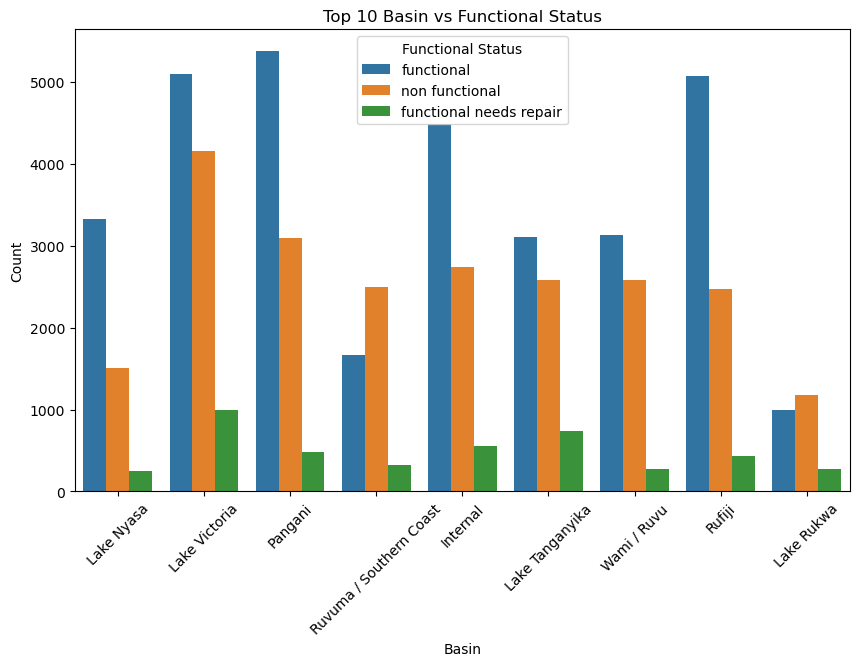

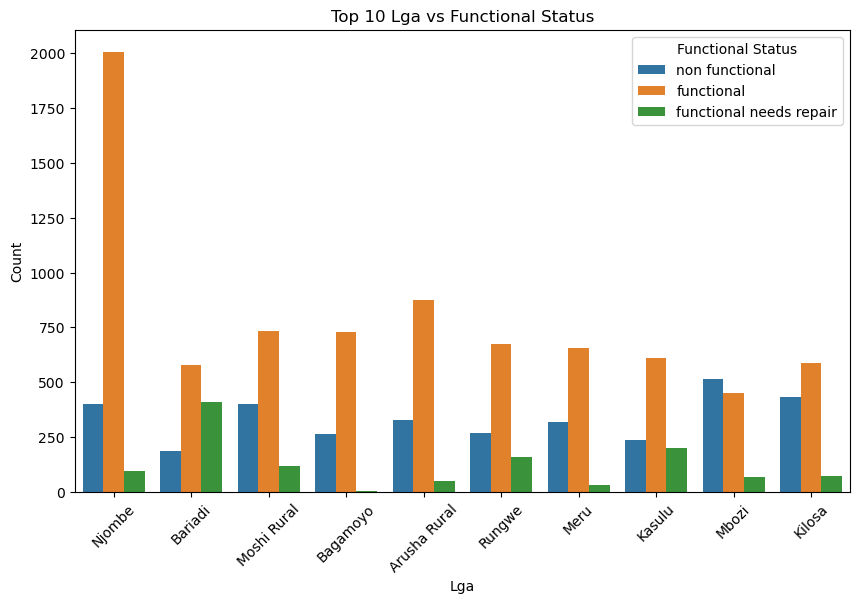

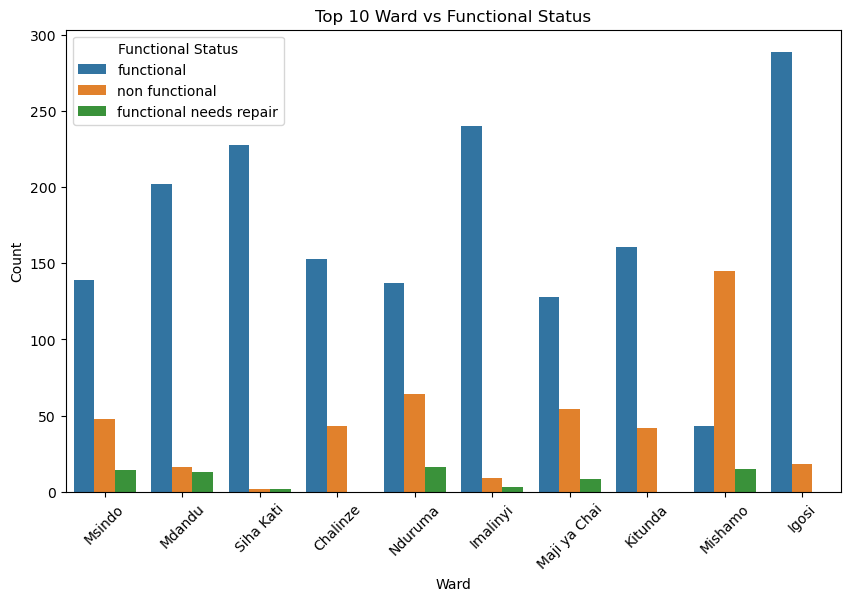

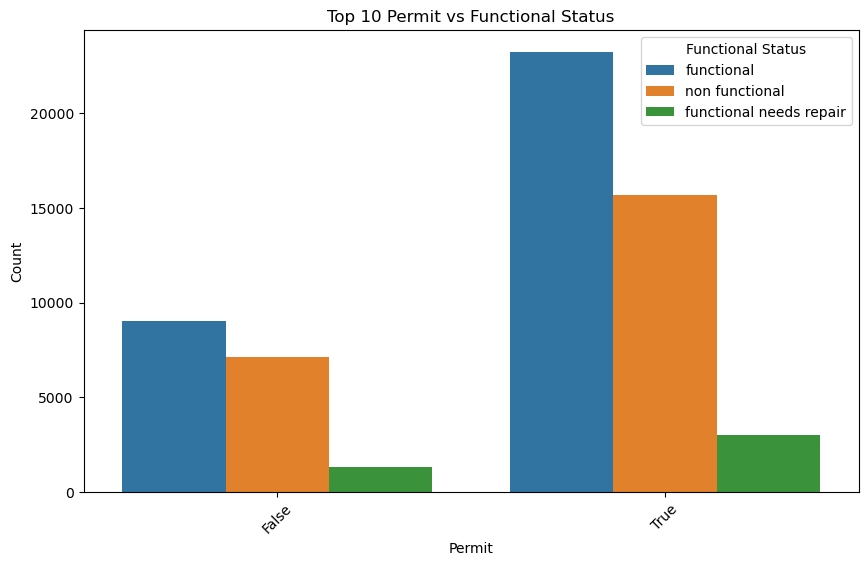

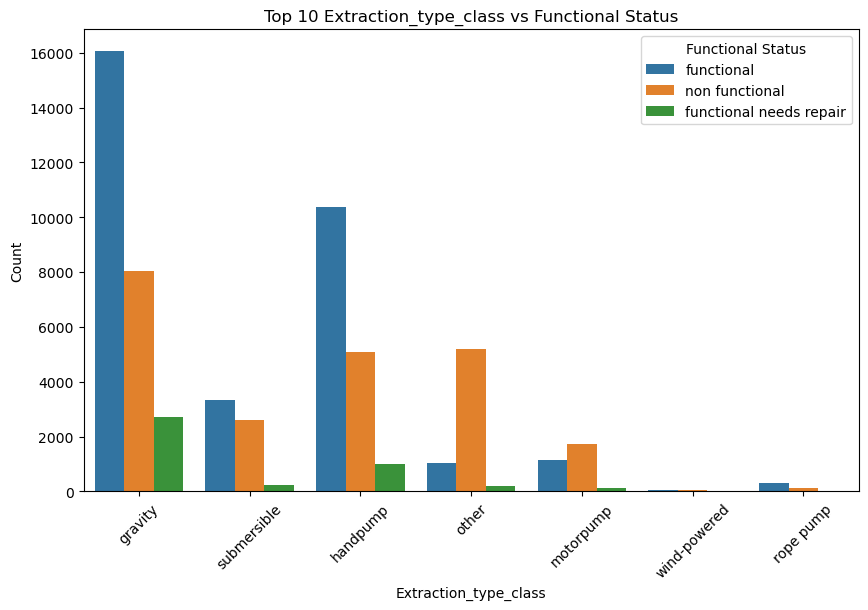

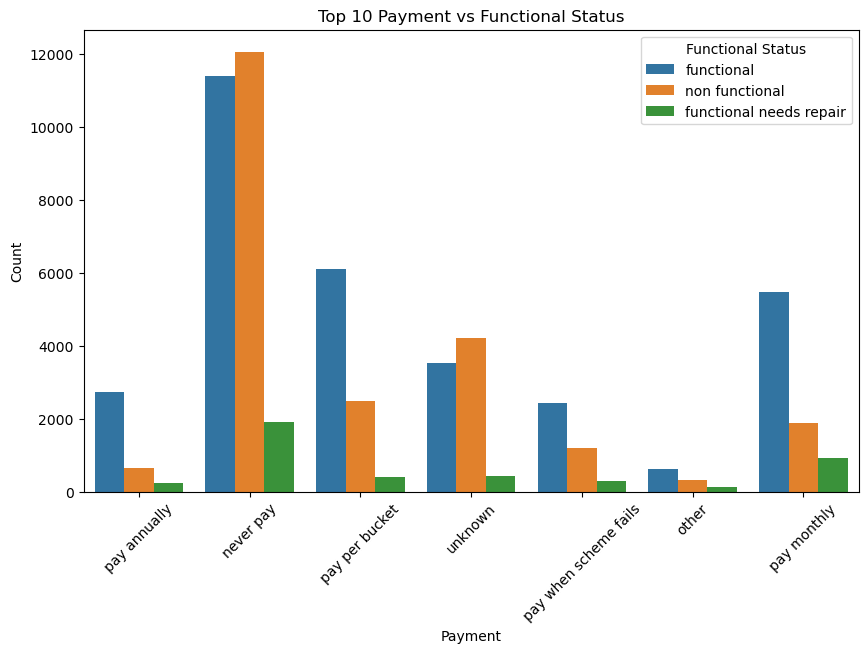

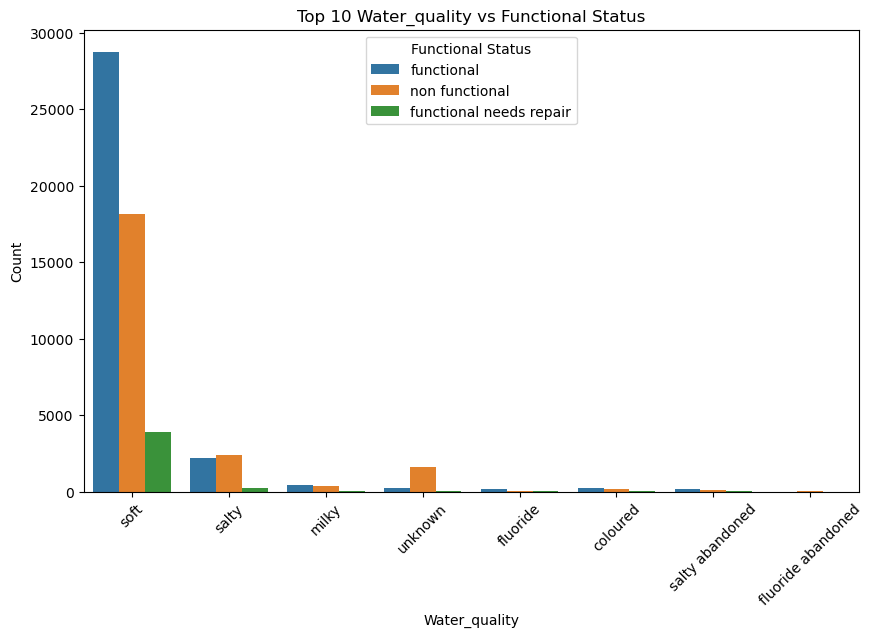

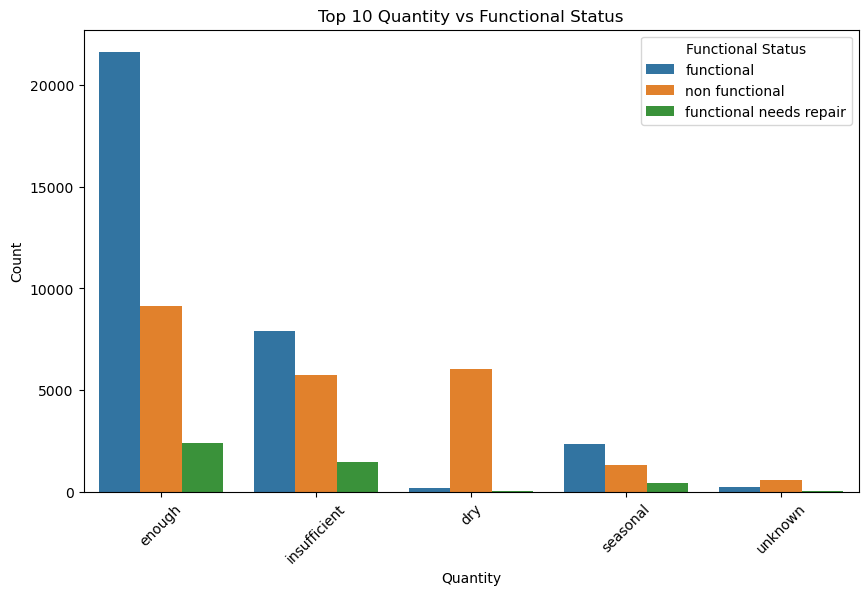

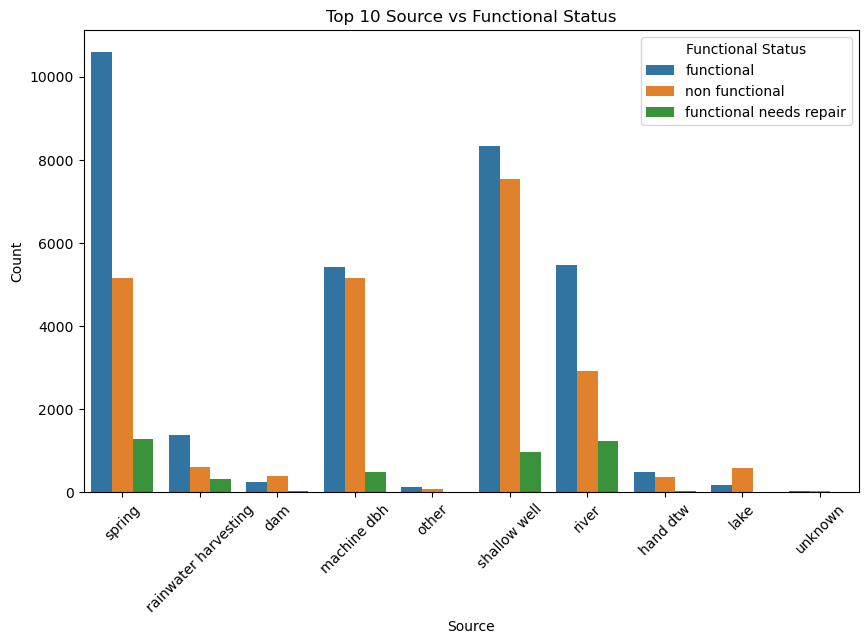

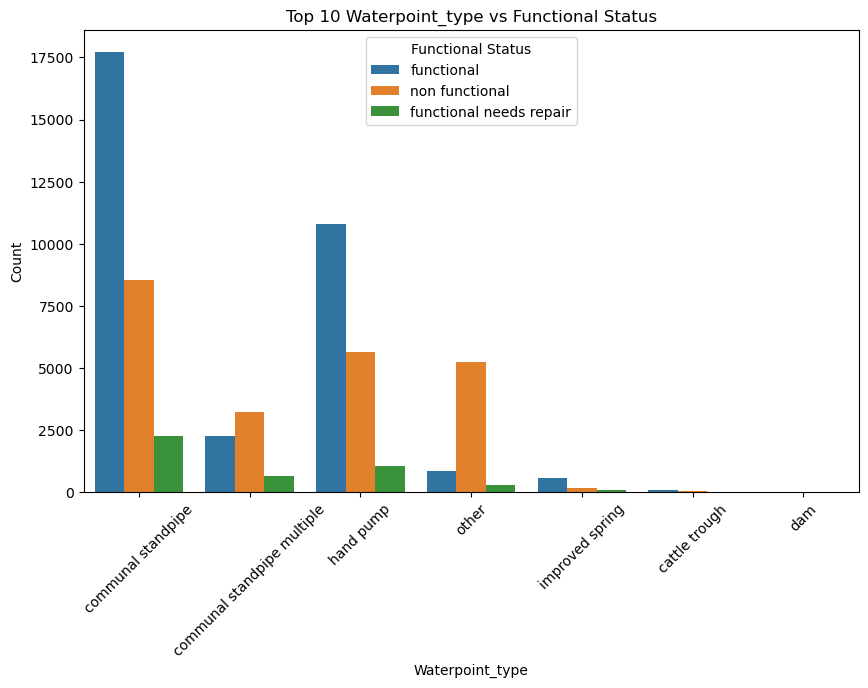

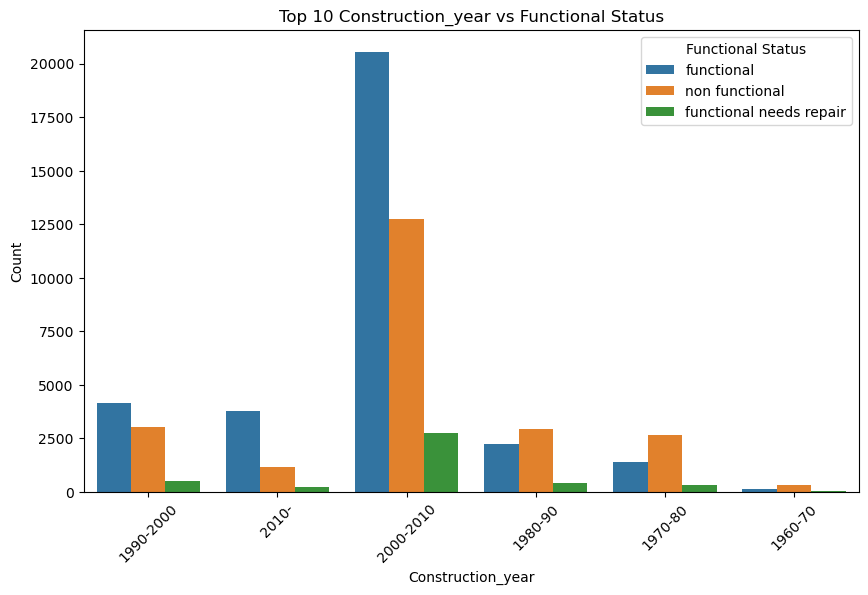

In [73]:

categorical_columns = ['basin', 'lga', 'ward', 'permit', 'extraction_type_class',
                       'payment', 'water_quality', 'quantity', 'source', 'waterpoint_type','construction_year']

# Generate visualizations for top 10 categories in categorical columns
for column in categorical_columns:
    top_10_categories = df[column].value_counts().nlargest(10).index
    plt.figure(figsize=(10, 6))
    sns.countplot(x=column, hue='status_group', data=df[df[column].isin(top_10_categories)])
    plt.title(f'Top 10 {column.capitalize()} vs Functional Status')
    plt.xlabel(column.capitalize())
    plt.ylabel('Count')
    plt.legend(title='Functional Status')
    plt.xticks(rotation=45)
    plt.show()


In [74]:
unique_sources = geomapped_df['construction_year'].unique()
print(unique_sources)

['1990-2000' '2010-' '2000-2010' '1980-90' '1970-80' '1960-70']


In [75]:

df.drop(columns=['id', 'gps_height', 'longitude', 'latitude', 'district_code', 'lga', 'ward','funder','installer','wpt_name','date_recorded',], inplace=True)


# Modelling

## Preparing Data for Modelling

In [76]:
#Creating a copy of the cleaned dataset for modelling purposes 
df1= df.copy()

## Convert Target into Binary Variables

In [77]:
#Coverting Target to Ternary Structure
target_status_group = {'functional':0, 
                   'non functional': 2, 
                   'functional needs repair': 1} 
df1['status_group'] = df['status_group'].replace(target_status_group)

In [78]:
#Checking that Ternary structure has been applied
df1['status_group'].value_counts()

0    32259
2    22824
1     4317
Name: status_group, dtype: int64

In [79]:
#Converting the Binary columns to integers
df1['permit'] = df1['permit'].astype(bool).astype(int)
df1['public_meeting'] = df1['public_meeting'].astype(bool).astype(int)

In [80]:
# assigning categorical columns
#categorical_cols = df1[['basin','construction_year','region','extraction_type_group','extraction_type_class','management','payment','water_quality','quantity',
#               'source','waterpoint_type']]

In [81]:
# assigning numeric columns
#numerical_cols = ['population','public_meeting','permit']

In [82]:
# assigning target
#target='status_group'

In [83]:
# Select the categorical columns to be encoded
categorical_cols = df1[['basin', 'region', 'construction_year', 'extraction_type_group', 'extraction_type_class',
                        'management', 'payment', 'water_quality', 'quantity', 'source', 'waterpoint_type']]

# Instantiate OneHotEncoder
ohe = OneHotEncoder()

# Fit and transform the selected feature group
dummies = ohe.fit_transform(categorical_cols)

# Create a DataFrame of dummy values
dummies_df = pd.DataFrame(dummies.toarray(), columns=ohe.get_feature_names_out())

# Concatenate the encoded columns with the original DataFrame
encoded_df = pd.concat([df1[['amount_tsh', 'population', 'public_meeting', 'permit']], dummies_df], axis=1)

# Check the resulting DataFrame
encoded_df.head()


,amount_tsh,population,public_meeting,permit,basin_Internal,basin_Lake Nyasa,basin_Lake Rukwa,basin_Lake Tanganyika,basin_Lake Victoria,basin_Pangani,...,source_shallow well,source_spring,source_unknown,waterpoint_type_cattle trough,waterpoint_type_communal standpipe,waterpoint_type_communal standpipe multiple,waterpoint_type_dam,waterpoint_type_hand pump,waterpoint_type_improved spring,waterpoint_type_other
0,6000.0,109,1,0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
1,0.0,280,1,1,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
2,25.0,250,1,1,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
3,0.0,58,1,1,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
4,0.0,0,1,1,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0


In [84]:

# Identify target variable
y = df1['status_group']

# Identify features
X = encoded_df

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


## 1. Initial Model/Dummy Model

In [85]:
#Instantiate.

dummy_model = DummyClassifier(random_state=42)

#Fit.

dummy_model.fit(X_train, y_train)

#Predict.

dummy_preds=dummy_model.predict(X_train)

In [86]:
def display_scores(true, preds, model_name):
   
    '''
    
    Returns a function running recall scores, classification_report, 
    and confusion_matrix for a model.
    
    '''
    
    
    rec = recall_score(true, preds, average='micro')
    rc = classification_report(true , preds)
    cm = confusion_matrix(true, preds)
    
    print("Model: {}".format(model_name))
    print("Recall: {}".format(rec))

    print("Classification Report:\n {}".format(rc))
    print("Confusion Matrix:\n {}".format(cm))
    print("--------------------------------------------------------------------------------")
    

    return display_scores


In [87]:

# Import the warnings module
import warnings

# Ignore the UndefinedMetricWarning
warnings.filterwarnings("ignore")

display_scores(y_train, dummy_preds, model_name = "Dummy Model");

Model: Dummy Model
Recall: 0.5429713804713805
Classification Report:
               precision    recall  f1-score   support

           0       0.54      1.00      0.70     25802
           1       0.00      0.00      0.00      3466
           2       0.00      0.00      0.00     18252

    accuracy                           0.54     47520
   macro avg       0.18      0.33      0.23     47520
weighted avg       0.29      0.54      0.38     47520

Confusion Matrix:
 [[25802     0     0]
 [ 3466     0     0]
 [18252     0     0]]
--------------------------------------------------------------------------------


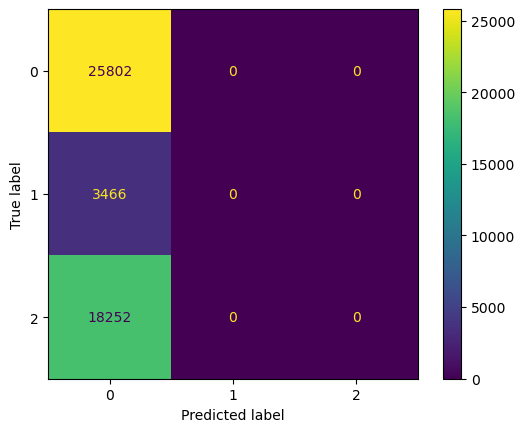

In [88]:
cm = confusion_matrix(y_train, dummy_preds)

# Display the confusion matrix
cm_display = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=[0, 1, 2])
cm_display.plot();

The confusion matrix and classification report for the Dummy Model indicate that the model is not predicting any positive instances (classes 1 and 2). This suggests that the model is not learning from the data and is predicting the majority class (class 0) for all instances.

The confusion matrix shows that the model predicts all instances as class 0, resulting in true positives (25802) for class 0 and no predictions for classes 1 and 2. The recall for class 0 is 1.00, which means that the model correctly identifies all instances of class 0. However, the recall for classes 1 and 2 is 0.00, indicating that the model fails to identify any instances of these classes.

The classification report further confirms these observations. The precision, recall, and F1-score for classes 1 and 2 are all 0.00, indicating that the model does not make any positive predictions for these classes. The accuracy of the model is 0.54, which is relatively high due to the majority class being correctly predicted, but it does not reflect the model's actual performance.

Therefore, the Dummy Model is not a useful model for classification as it fails to predict any positive instances and performs poorly for classes 1 and 2. Therefore, I proceeded to develop another baseline model which i wanted to build on.

## 2. Decision Tree Classifier

In [89]:
# Instantiate DecisionTreeClassifier.

clf = DecisionTreeClassifier(max_depth=3,random_state=42)

# Fit.

clf.fit(X_train, y_train)

# Predict.

y_pred = (clf.predict(X_train))

# Display scores.
display_scores(y_train, y_pred, model_name = "DecisionTreeClassifier");

Model: DecisionTreeClassifier
Recall: 0.6960227272727273
Classification Report:
               precision    recall  f1-score   support

           0       0.68      0.90      0.77     25802
           1       0.00      0.00      0.00      3466
           2       0.75      0.54      0.63     18252

    accuracy                           0.70     47520
   macro avg       0.47      0.48      0.47     47520
weighted avg       0.65      0.70      0.66     47520

Confusion Matrix:
 [[23251     0  2551]
 [ 2690     0   776]
 [ 8428     0  9824]]
--------------------------------------------------------------------------------


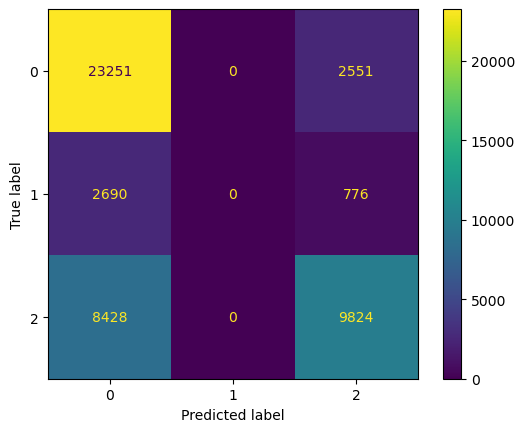

In [90]:
cm_display = ConfusionMatrixDisplay.from_predictions(y_train, y_pred)

Model: DecisionTreeClassifier
Recall: 0.6960227272727273

Precision: Precision measures the accuracy of the positive predictions. The precision for label 0 is 0.68, which means that 68% of the samples predicted as label 0 are actually label 0. Precision for label 1 and label 2 are 0.0 and 0.75, respectively.

Recall: Recall measures the ability of the model to correctly identify the positive samples. The recall for label 0 is 0.90, indicating that 90% of the actual label 0 samples were correctly identified. Recall for label 1 is 0.0, indicating that none of the actual label 1 samples were correctly identified. Recall for label 2 is 0.54, indicating that 54% of the actual label 2 samples were correctly identified.

F1-score: The F1-score is the harmonic mean of precision and recall, providing a balanced measure of the model's performance. The F1-score for label 0 is 0.77, label 1 is 0.0, and label 2 is 0.63. 

Overall, the DecisionTreeClassifier model has an accuracy of 0.70, meaning that it correctly predicts the labels for 70% of the samples. The model performs well in identifying label 0, with high precision and recall. However, it struggles to identify label 1, as indicated by the low precision and recall for that class. The model shows moderate performance for label 2, with a reasonably high precision and a moderate recall.

This model performed quite well compared to the dummy model and therefore, i proceeded to improve on it. It suffered from class imbalance. I proceeded to use the Logistic Regression Model.


## 3. Logistic Regression Model

In [91]:

# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize the Logistic Regression model
logreg = LogisticRegression()

# Fit the model to the training data
logreg.fit(X_train, y_train)

# Make predictions on the training set
y_pred_train = logreg.predict(X_train)

# Make predictions on the test set
y_pred_test = logreg.predict(X_test)

# Evaluate the model
accuracy_train = accuracy_score(y_train, y_pred_train)
accuracy_test = accuracy_score(y_test, y_pred_test)

classification_report_train = classification_report(y_train, y_pred_train)
classification_report_test = classification_report(y_test, y_pred_test)

confusion_matrix_train = confusion_matrix(y_train, y_pred_train)
confusion_matrix_test = confusion_matrix(y_test, y_pred_test)

# Print the evaluation metrics
print("Accuracy - Train:", accuracy_train)
print("Accuracy - Test:", accuracy_test)

print("\nClassification Report - Train:")
print(classification_report_train)

print("\nClassification Report - Test:")
print(classification_report_test)

print("\nConfusion Matrix - Train:")
print(confusion_matrix_train)

print("\nConfusion Matrix - Test:")
print(confusion_matrix_test)


Accuracy - Train: 0.717003367003367
Accuracy - Test: 0.7172558922558923

Classification Report - Train:
              precision    recall  f1-score   support

           0       0.69      0.91      0.79     25802
           1       0.10      0.00      0.00      3466
           2       0.79      0.57      0.67     18252

    accuracy                           0.72     47520
   macro avg       0.53      0.50      0.48     47520
weighted avg       0.69      0.72      0.68     47520


Classification Report - Test:
              precision    recall  f1-score   support

           0       0.69      0.92      0.79      6457
           1       0.00      0.00      0.00       851
           2       0.80      0.57      0.66      4572

    accuracy                           0.72     11880
   macro avg       0.50      0.50      0.48     11880
weighted avg       0.68      0.72      0.68     11880


Confusion Matrix - Train:
[[23600    16  2186]
 [ 2913     3   550]
 [ 7773    10 10469]]

Confusion M

The accuracy scores for both the training and test sets are similar, with an accuracy of approximately 71.6% for the training set and 71.5% for the test set. This implies there is no overfitting or underfitting it.

Looking at the confusion matrices, it is evident that the model struggles with predicting class 1 in both the training and test sets. Class 1 is consistently predicted as class 0 or class 2, resulting in a high number of false negatives and low recall for class 1.

Overall, the model's performance is relatively low, especially for class 1, which is not predicted correctly at all. I proceeded further to investigate other models.

## 4. Light Gradient Boosting Machine (LGBM)

In [92]:

# Select the categorical columns to be encoded
categorical_cols = ['basin', 'region', 'construction_year', 'extraction_type_group', 'extraction_type_class',
                    'management', 'payment', 'water_quality', 'quantity', 'source', 'waterpoint_type']

# Instantiate OneHotEncoder
ohe = OneHotEncoder()

# Fit and transform the selected categorical columns
encoded_categorical_cols = ohe.fit_transform(df1[categorical_cols])

# Convert the encoded categorical columns to a DataFrame
encoded_categorical_df = pd.DataFrame(encoded_categorical_cols.toarray(), columns=ohe.get_feature_names_out())

# Concatenate the encoded categorical columns with the numerical columns
encoded_df = pd.concat([encoded_categorical_df, df1[['amount_tsh', 'population', 'public_meeting', 'permit']]], axis=1)

# Identify target variable
y = df1['status_group']

# Identify features
X = encoded_df

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42, test_size=0.2)

# Instantiate an LGBMClassifier
lgbm = LGBMClassifier(random_state=42)

# Fit the model
lgbm.fit(X_train, y_train)

# Predict
lgbm_preds = lgbm.predict(X_train)

# Display scores
display_scores(y_train, lgbm_preds, model_name='LGBM');


Model: LGBM
Recall: 0.7841750841750842
Classification Report:
               precision    recall  f1-score   support

           0       0.76      0.92      0.83     25802
           1       0.69      0.18      0.28      3466
           2       0.85      0.70      0.77     18252

    accuracy                           0.78     47520
   macro avg       0.77      0.60      0.63     47520
weighted avg       0.79      0.78      0.77     47520

Confusion Matrix:
 [[23824   156  1822]
 [ 2372   607   487]
 [ 5305   114 12833]]
--------------------------------------------------------------------------------


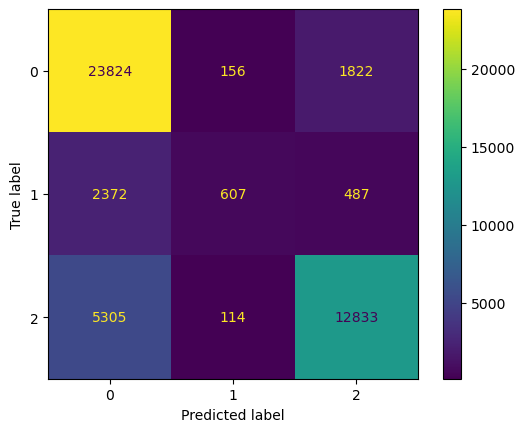

In [93]:
cm_display = ConfusionMatrixDisplay.from_predictions(y_train, lgbm_preds)

Recall: The overall recall of the model is 0.784, indicating that it correctly identifies approximately 78.4% of the instances across all classes.

Class 0 (functional): The precision is 0.76, indicating that 76% of the instances predicted as functional are actually functional. The recall is 0.92, indicating that 92% of the functional instances are correctly identified. 

Class 1 (functional needs repair): The precision is 0.69, indicating that 69% of the instances predicted as needing repair are actually in need of repair. The recall is 0.18, indicating that only 18% of the instances needing repair are correctly identified. The F1-score is 0.28, which suggests that the model struggles to accurately classify instances in this class.
Class 2 (non-functional): The precision is 0.85, indicating that 85% of the instances predicted as non-functional are indeed non-functional. The recall is 0.70, indicating that 70% of the non-functional instances are correctly identified. 

The F1-score is 0.77, suggesting a relatively good performance in classifying non-functional instances.

Accuracy: The overall accuracy of the model is 0.78, indicating that it correctly predicts approximately 78% of the instances across all classes.

The LGBM model shows relatively good performance in correctly classifying functional and non-functional instances, but it struggles with accurately identifying instances of class 1. 

## 5. XGBClassifier

In [94]:
# Initialize the XGBClassifier
xgb = XGBClassifier(objective='multi:softmax', booster='gbtree', num_class=3,
                    eval_metric='merror', eta=0.1, max_depth=10, colsample_bytree=0.4,
                    n_jobs=-1, learning_rate=0.05)

# Fit the XGBClassifier to your training data
xgb.fit(X_train, y_train)

# Make predictions on the training set
y_pred_train = xgb.predict(X_train)

# Make predictions on the test set
y_pred_test = xgb.predict(X_test)


# Compute the confusion matrix
cm = confusion_matrix(y_test, y_pred_test)

# Display scores 
display_scores(y_test, y_pred_test , model_name='XGBClassifier');

Model: XGBClassifier
Recall: 0.7806397306397307
Classification Report:
               precision    recall  f1-score   support

           0       0.75      0.93      0.83      6457
           1       0.66      0.17      0.27       851
           2       0.86      0.69      0.76      4572

    accuracy                           0.78     11880
   macro avg       0.76      0.59      0.62     11880
weighted avg       0.78      0.78      0.76     11880

Confusion Matrix:
 [[5995   47  415]
 [ 595  141  115]
 [1409   25 3138]]
--------------------------------------------------------------------------------


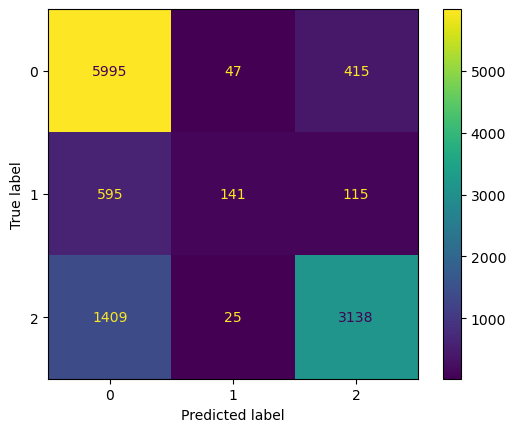

In [95]:
cm_display = ConfusionMatrixDisplay.from_predictions(y_test, y_pred_test)


Recall: The average recall across all classes is 0.7806, indicating that the model is able to correctly identify approximately 78.06% of the positive instances in the dataset.

Classification Report: The precision, recall, and F1-score are reported for each class (0, 1, 2). Class 0 has a precision of 0.75, indicating that 75% of the predicted instances for class 0 are actually correct. Class 0 also has a recall of 0.93, indicating that 93% of the actual instances of class 0 are correctly predicted by the model.

Overall, the XGBClassifier model achieves an accuracy of 78% on the test set, with a higher precision, recall, and F1-score for class 0 compared to classes 1 and 2. The model performs relatively well in identifying instances of class 0 but struggles with the minority classes (1 and 2) due to their imbalanced nature. I will consider strategies to address class imbalance and also explore another model (LGBM)  to improve performance on the minority classes.

## 6. Random Forest

In [96]:
# Instantiate a RandomForestClassifier.

rfc = RandomForestClassifier(n_estimators=500, random_state=42)

# Fit.

rfc.fit(X_train, y_train)

# Predict.

rfc_preds = rfc.predict(X_train)

# Display scores.

display_scores(y_train, rfc_preds , model_name='Random Forest');

Model: Random Forest
Recall: 0.9014730639730639
Classification Report:
               precision    recall  f1-score   support

           0       0.88      0.96      0.92     25802
           1       0.85      0.62      0.72      3466
           2       0.94      0.87      0.90     18252

    accuracy                           0.90     47520
   macro avg       0.89      0.82      0.85     47520
weighted avg       0.90      0.90      0.90     47520

Confusion Matrix:
 [[24727   231   844]
 [ 1069  2155   242]
 [ 2147   149 15956]]
--------------------------------------------------------------------------------


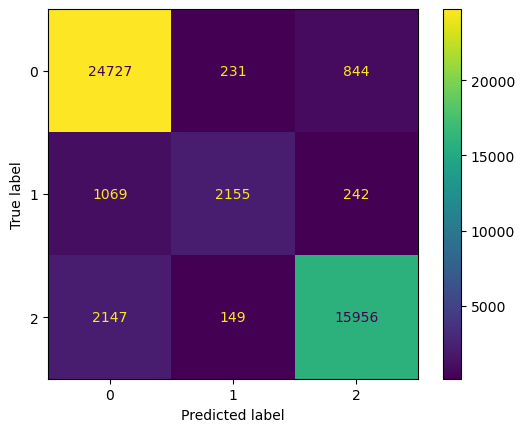

In [97]:
cm_display = ConfusionMatrixDisplay.from_predictions(y_train, rfc_preds)

Model: Random Forest

Recall: 0.9014730639730639

Precision: The precision for label 0 is 0.88, indicating that 88% of the samples predicted as label 0 are actually label 0. Precision for label 1 is 0.85, and for label 2 is 0.94. These values indicate a high level of accuracy in predicting the positive samples for each label.

Recall: The recall for label 0 is 0.96, meaning that 96% of the actual label 0 samples were correctly identified. Recall for label 1 is 0.62, indicating that 62% of the actual label 1 samples were correctly identified. Recall for label 2 is 0.87, indicating that 87% of the actual label 2 samples were correctly identified. The model performs well in identifying label 0 and label 2, but has relatively lower performance for label 1 because of class imbalance.

F1-score: The F1-score for label 0 is 0.92, label 1 is 0.72, and label 2 is 0.90.

Overall, the Random Forest model has an accuracy of 0.90, meaning that it correctly predicts the labels for 90% of the samples. The model performs well in identifying label 0 and label 2, with high precision and recall for both classes. However, it shows relatively lower performance for label 1, as indicated by the lower precision and recall for that class.

This model improves significantly from DecisionTreeClassifier. 

## 7. Random Forest with SMOTE to handle class imbalance problems

In [98]:

# Instantiate SMOTE
smote = SMOTE(random_state=42)

# Apply SMOTE to training data
X_train_smote, y_train_smote = smote.fit_resample(X_train, y_train)

# Instantiate RandomForestClassifier
rfc = RandomForestClassifier(n_estimators=500, random_state=42)

# Fit the Random Forest classifier on the SMOTE-transformed training data
rfc.fit(X_train_smote, y_train_smote)

# Predict using the trained model
rfc_preds = rfc.predict(X_train)

# Display scores
print("Classification Report:")
print(classification_report(y_train, rfc_preds))
print("Confusion Matrix:")
print(confusion_matrix(y_train, rfc_preds))


Classification Report:
              precision    recall  f1-score   support

           0       0.92      0.88      0.90     25802
           1       0.49      0.83      0.62      3466
           2       0.93      0.88      0.90     18252

    accuracy                           0.87     47520
   macro avg       0.78      0.86      0.81     47520
weighted avg       0.90      0.87      0.88     47520

Confusion Matrix:
[[22637  2142  1023]
 [  436  2885   145]
 [ 1438   832 15982]]


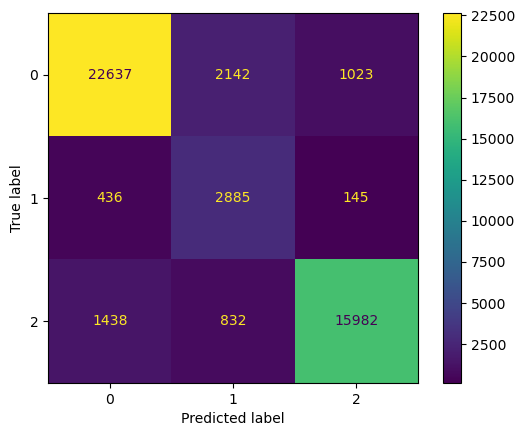

In [99]:

cm_display = ConfusionMatrixDisplay.from_predictions(y_train, rfc_preds)


Precision for class 0 is 0.92, indicating that 92% of the instances predicted as class 0 are actually true positives.
Precision for class 1 is 0.49, suggesting that only 49% of the instances predicted as class 1 are true positives.
Precision for class 2 is 0.93, indicating that 93% of the instances predicted as class 2 are true positives.


Recall for class 0 is 0.88, indicating that 88% of the actual class 0 instances are correctly predicted.
Recall for class 1 is 0.83, suggesting that 83% of the actual class 1 instances are correctly predicted.
Recall for class 2 is 0.88, indicating that 88% of the actual class 2 instances are correctly predicted.
F1-score: The F1-score is the harmonic mean of precision and recall, providing a balanced measure of the model's performance. In this case:

The F1-score for class 0 is 0.90, indicating a good balance between precision and recall for class 0 predictions.
The F1-score for class 1 is 0.62, suggesting that there is room for improvement in balancing precision and recall for class 1 predictions.
The F1-score for class 2 is 0.90, indicating a good balance between precision and recall for class 2 predictions.

Accuracy:The overall accuracy is 0.87, indicating that the model correctly predicts 87% of the instances.

Based on the classification report, the model performs well in predicting class 0 and class 2, with high precision, recall, and F1-scores. However, it performs relatively poorly in predicting class 1, with lower precision, recall, and F1-score values.

The model accuracy score has actually declined when applying SMOTE hence its better to have the final model without tuning using SMOTE method.

## Conclusion

Based on the results of the Random Forest model, we can draw the following conclusions:
I observed that the precision for functional waterpoints (label 0) is 0.88, implying that 88% of the samples predicted as functional are actually functional. The precision for waterpoints that need repair (label 1) is 0.85, indicating 85% accuracy in predicting this category. For non-functional waterpoints (label 2), the precision is 0.94, demonstrating 94% accuracy. These high precision values suggest that the Random Forest model performs well in accurately identifying positive samples for each label.

Moreover, the findings show that the recall for functional waterpoints (label 0) is 0.96, meaning that 96% of the actual functional samples were correctly identified. However, the recall for waterpoints that need repair (label 1) is 0.62, indicating that only 62% of the actual samples needing repair were correctly identified. The recall for non-functional waterpoints (label 2) is 0.87, indicating that 87% of the actual non-functional samples were correctly identified. While the model performs exceptionally well in identifying functional and non-functional waterpoints, it has relatively lower performance in correctly identifying waterpoints that need repair.

I found that the F1-score for functional waterpoints (label 0) is 0.92, for waterpoints needing repair (label 1) is 0.72, and for non-functional waterpoints (label 2) is 0.90. These scores indicate good overall performance, with functional and non-functional waterpoints achieving higher F1-scores compared to waterpoints that need repair.

Overall, the Random Forest model demonstrates significant improvement compared to the Initial Model/Dummy Model, Decision Tree Classifier, Logistic Regression Model, Light Gradient Boosting Machine (LGBM), XGBClassifier and Random Forest with SMOTE

It achieved an accuracy of 0.90, indicating that it correctly predicts the labels for 90% of the samples. The model performs well in accurately identifying functional and non-functional waterpoints, but it struggles to correctly identify waterpoints that need repair, possibly due to class imbalance. To further enhance the model's performance, it is recommended to address the class imbalance issue and explore techniques such as oversampling or undersampling to improve the prediction of waterpoints needing repair.

In conclusion, the Random Forest model shows promise in predicting the condition of waterpoints in Tanzania. By focusing resources on waterpoints that are likely to fail or need repair, implementing more reliable pump types, and ensuring accurate data gathering in collaboration with local governments, we can improve maintenance operations and ensure the availability of clean and potable water to communities across the country.




